In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
import admin_functions as adfn
#plt.style.use('dark_background')
sns.reset_orig()
%load_ext autoreload
%autoreload

# Define paths
#------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/Applications/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/Applications/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Use

In [20]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_cutrealtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_cutrealtrace.npy'))
p20raw = sorted(glob.glob('*PTZ20*_cutrealtrace.npy'))
blnraw, p5raw, p20raw

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_cutrealtrace.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_cutrealtrace.npy',
  'PTZ-WILDTY

## Generalised seizures

Find start and end of all generalised events
* Fit a smooth baseline - create standard deviation 
* Find all timeframes where amplitude is above baseline*scalar
* Find all timeframes that are continuously above >10 frames

In [21]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
p20raw = sorted(glob.glob('*PTZ20*_realtrace.npy'))
p20raw

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ20_run-01_realtrace.npy']

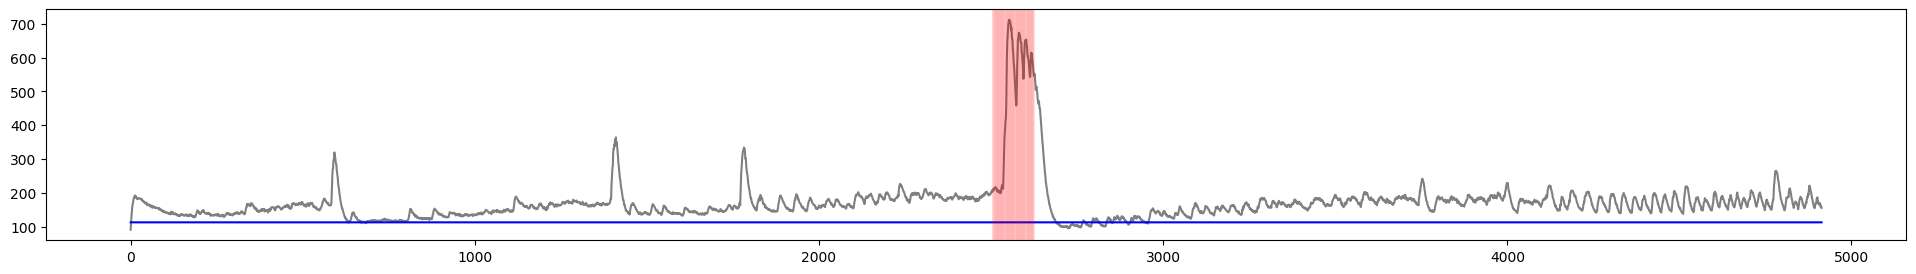

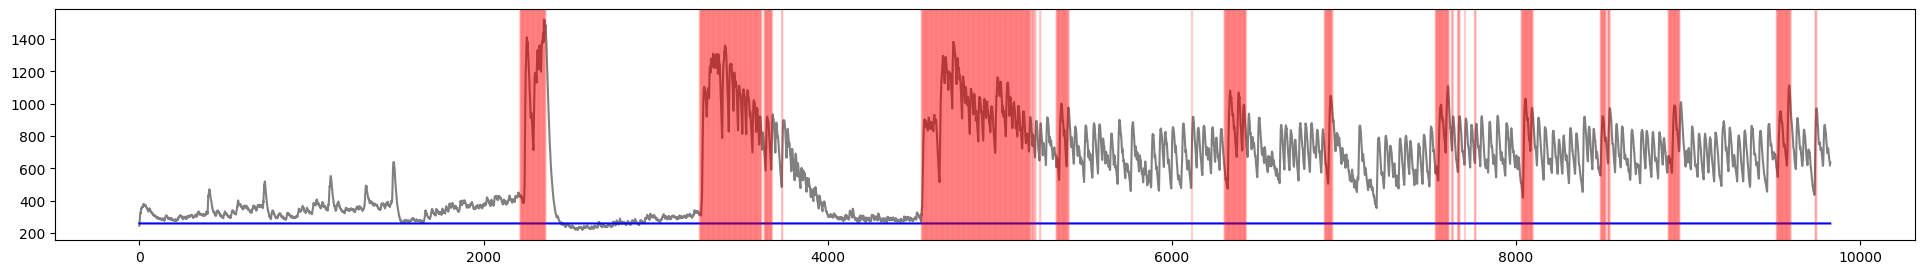

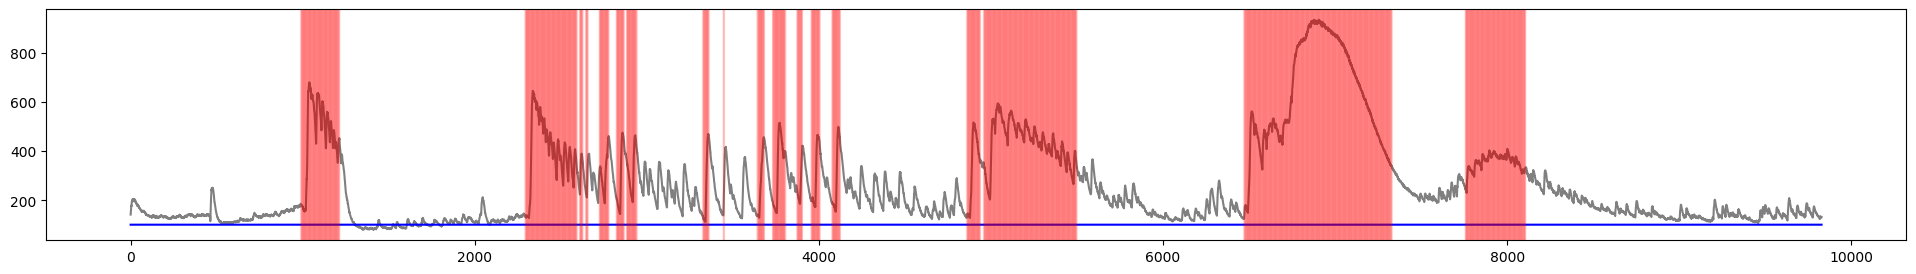

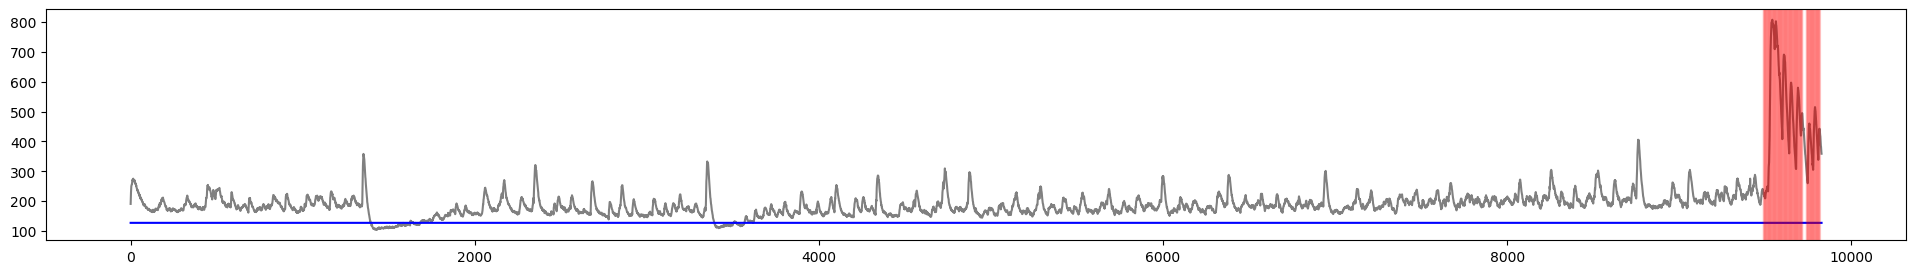

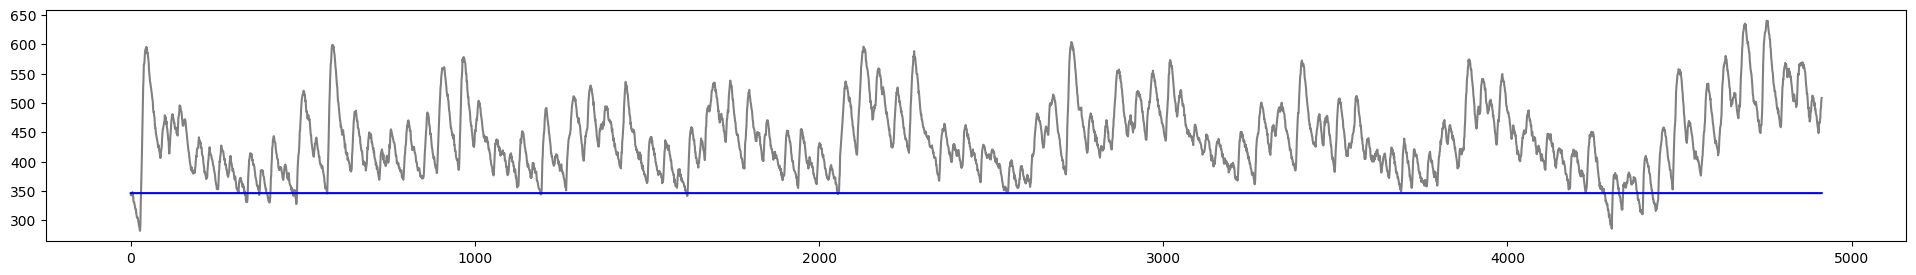

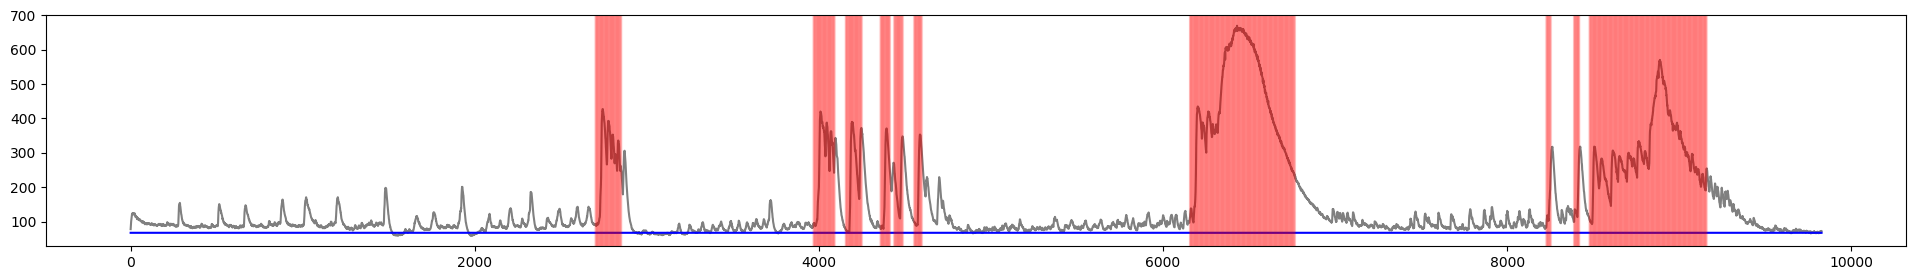

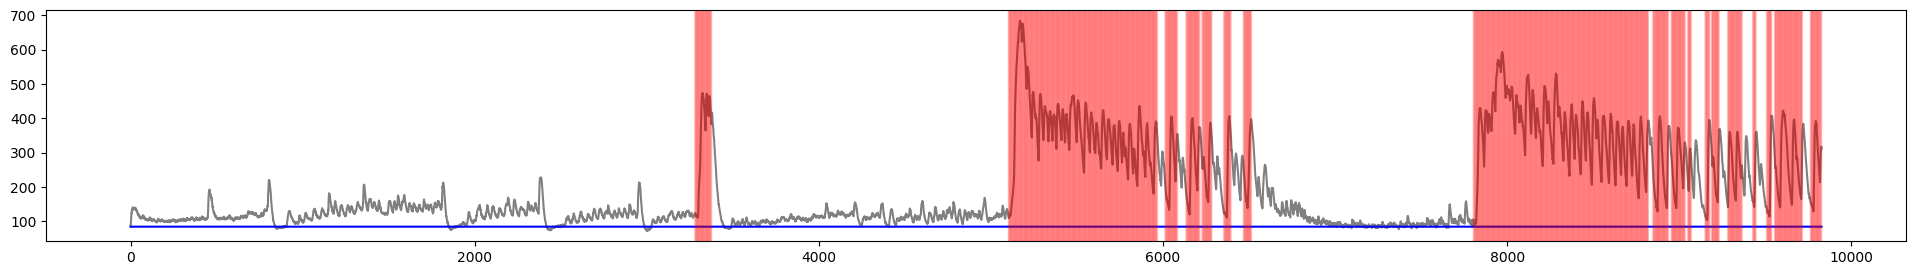

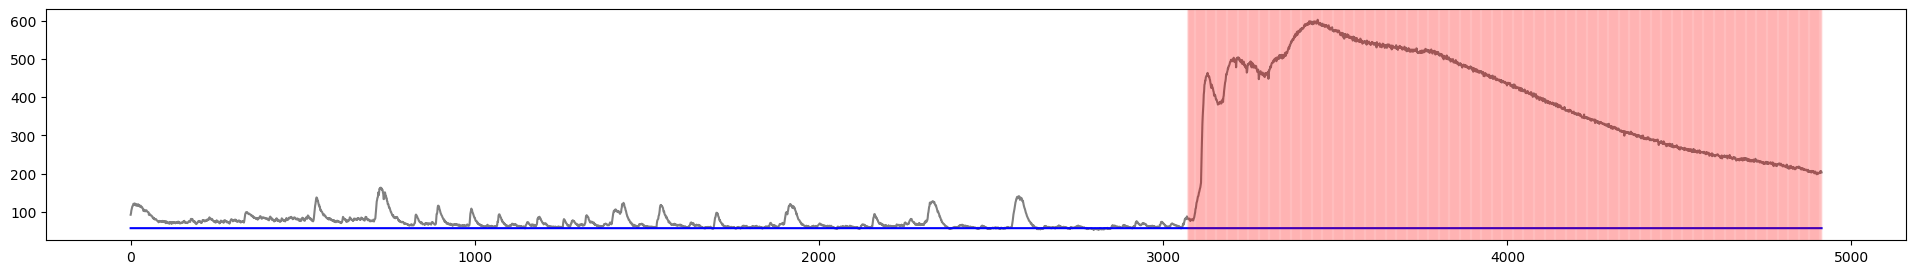

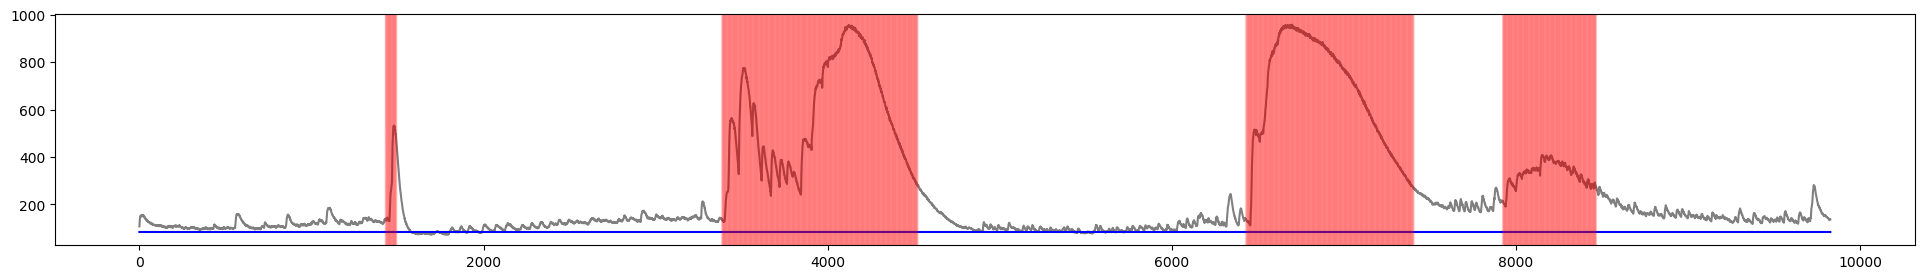

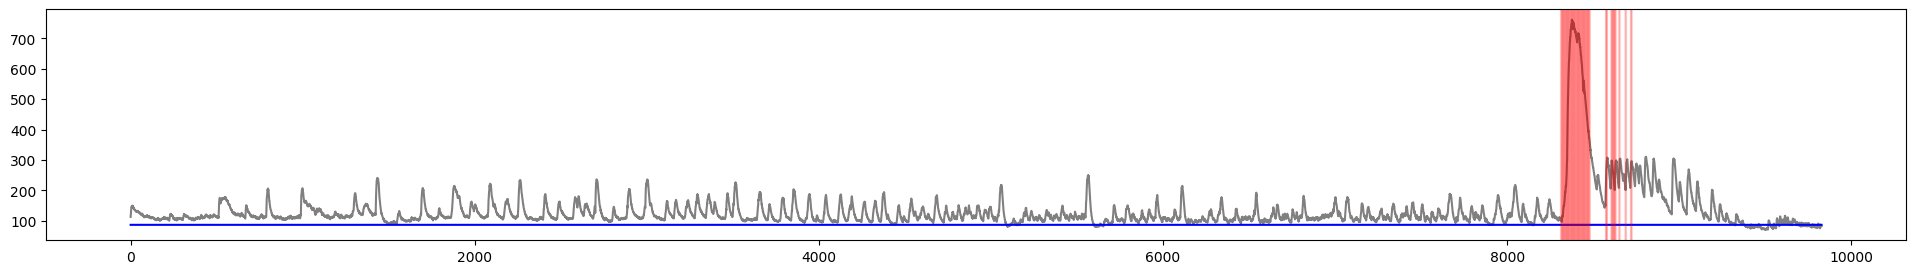

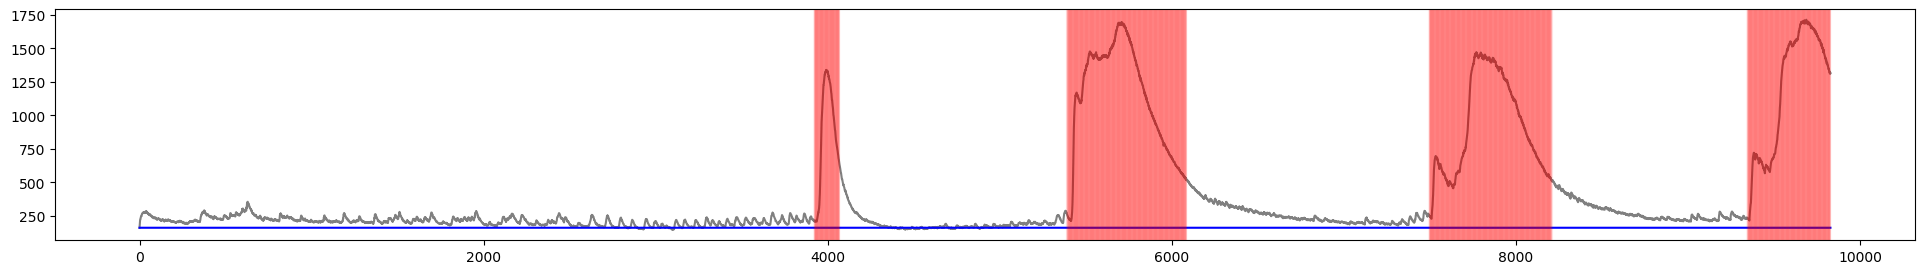

In [105]:
window = adfn.window(50, mean.shape[0])[0]
scalar = 3
percentile = 0.08
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    baseline = np.zeros(mean.shape[0])
    for i in range(mean.shape[0]):
        baseline[i] = (np.mean(mean[np.where(mean < np.quantile(mean, percentile, axis=0))]))
        
    meanbase = np.mean(baseline)
    gen_index = []
    for e in range(mean.shape[0]):
        if np.mean(mean[e:e+window]) > scalar*meanbase:
            gen_index = np.append(gen_index, e)

    fig, ax = plt.subplots(figsize= (24,3))  
    plt.plot(mean, c='grey')
    plt.plot(baseline, c = 'blue')
    for x in gen_index: plt.axvline(x=x, c='red', alpha = 0.05)
    plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


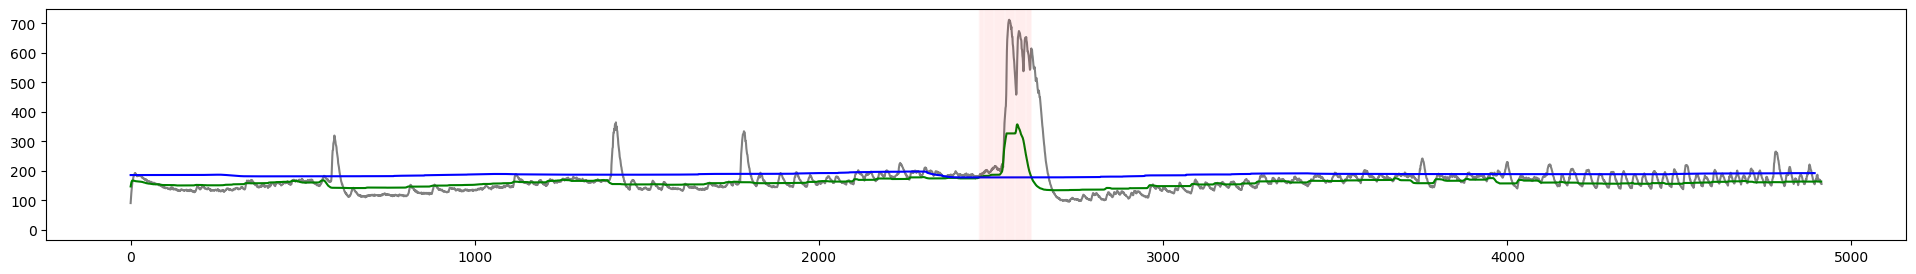

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


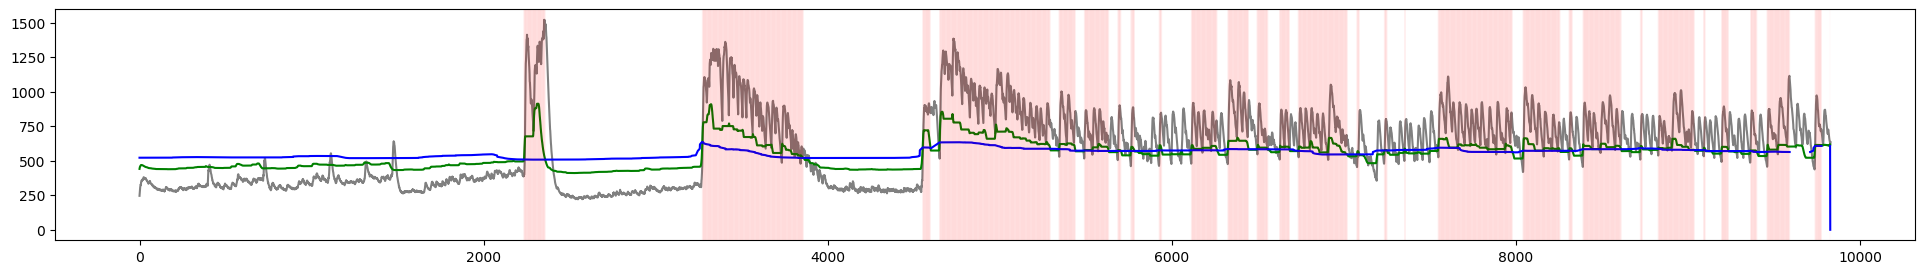

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


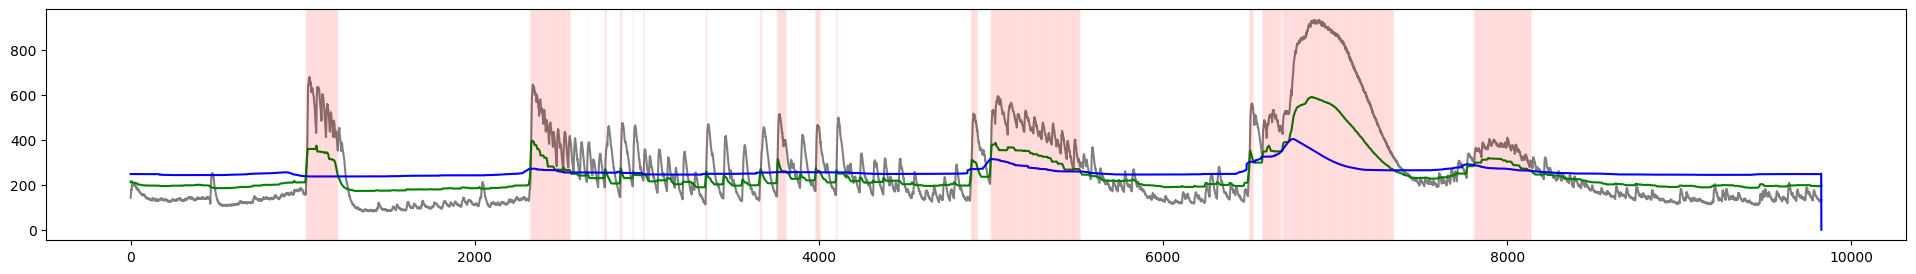

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


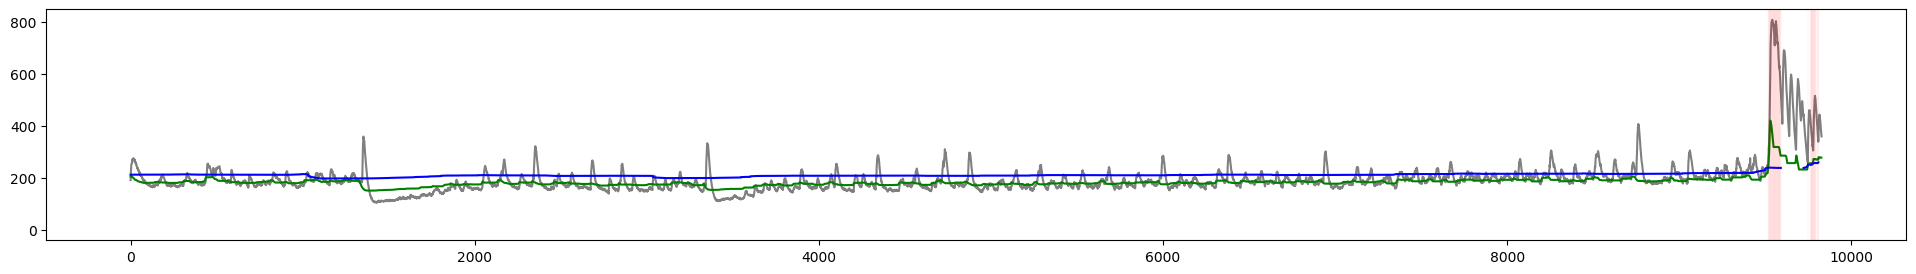

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


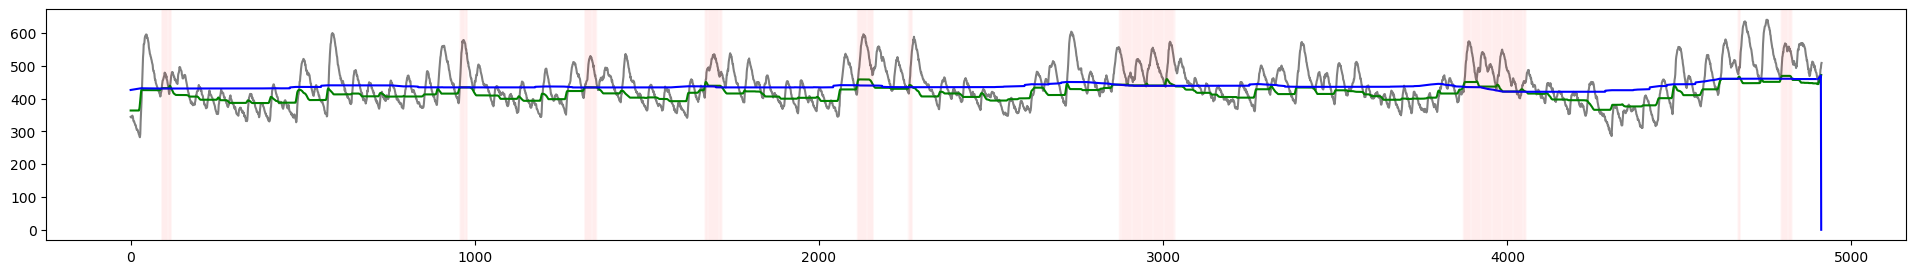

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


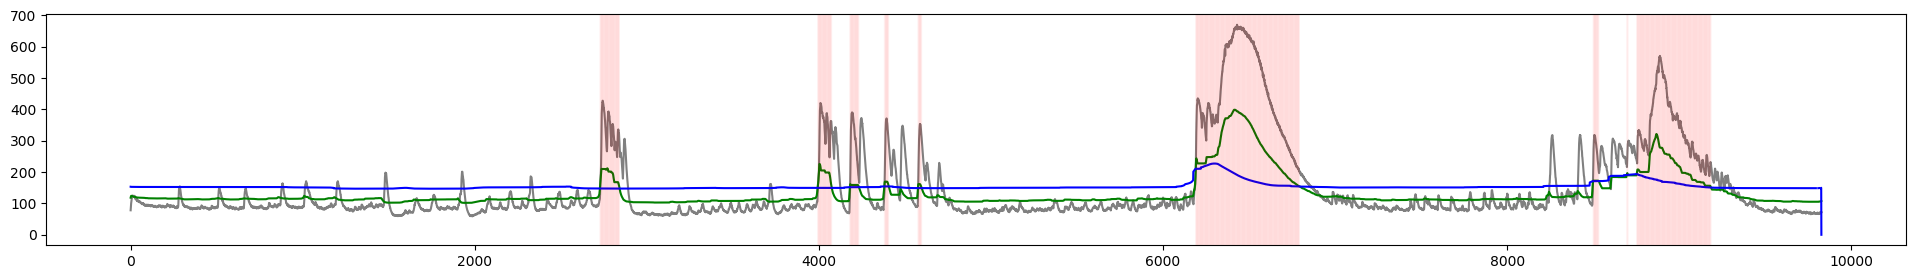

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


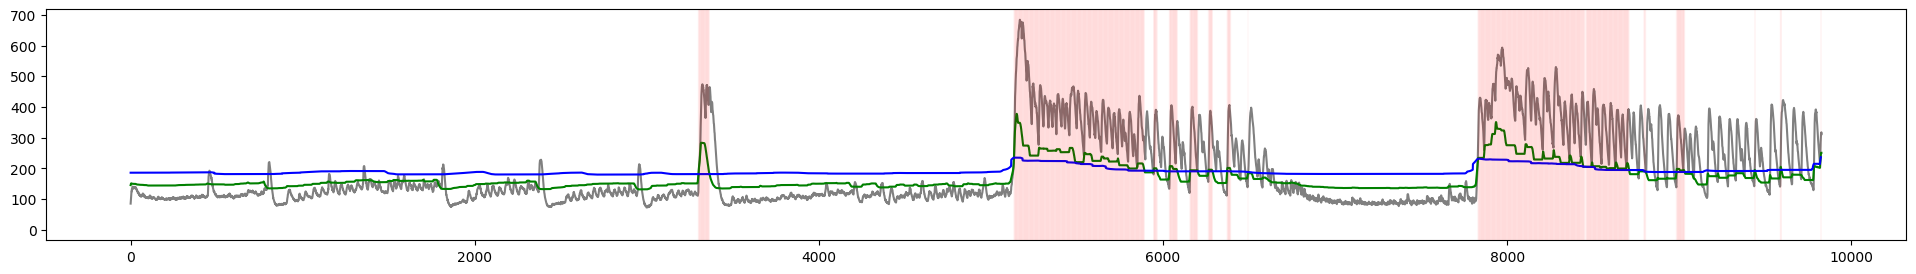

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


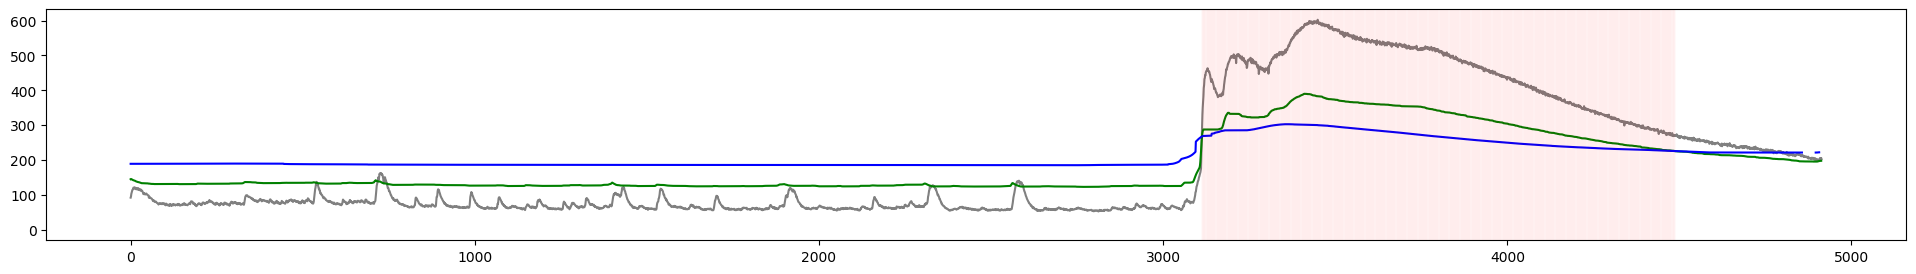

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


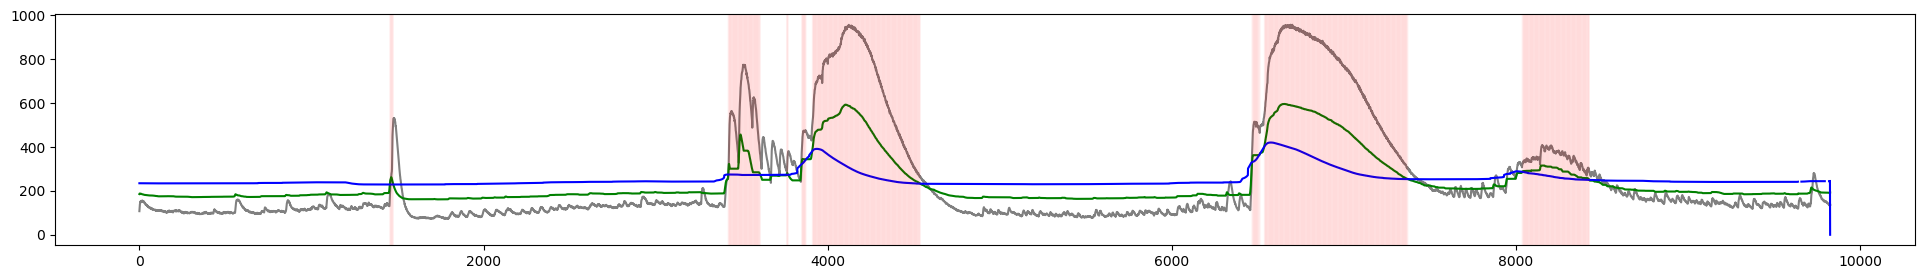

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


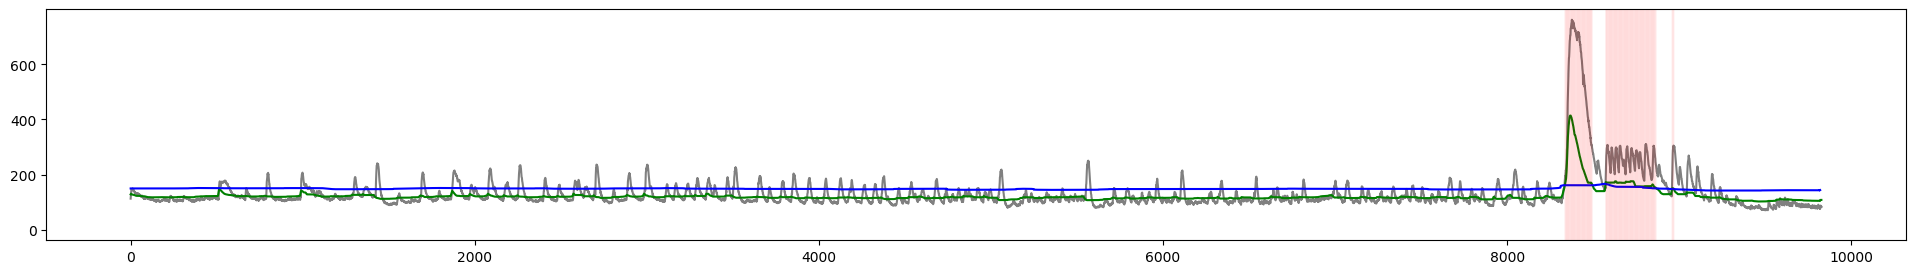

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


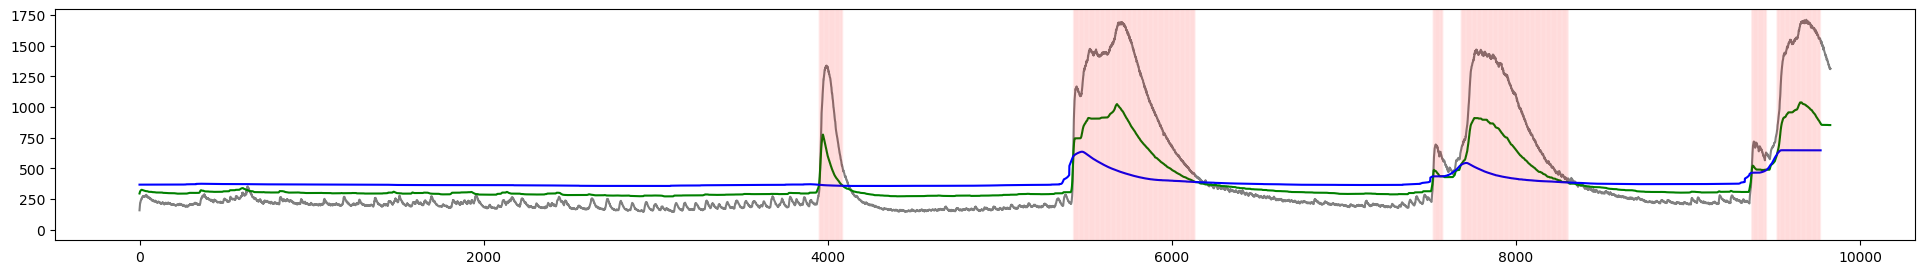

In [186]:
smooth_window = adfn.window(50, mean.shape[0])[0]
base_window = adfn.window(50, mean.shape[0]-1)[0]
smooth_percentile = 0.08
base_percentile = 0.2
for o in range(len(p20raw)):
    p20 = np.load(p20raw[o])
    mean = np.apply_along_axis(np.mean, 0, p20)
    smooth = np.zeros(mean.shape[0]-1)
    baseline = np.zeros(mean.shape[0]-1)
    gen_index = []
    for i in range(mean.shape[0]-1):
        smooth[i] = (np.mean(mean) + np.mean(mean[i:i+smooth_window][np.where(mean[i:i+smooth_window] < np.quantile(mean[i:i+smooth_window], smooth_percentile, axis=0))]))/2
    for e in range(smooth.shape[0]-1): 
        baseline[e] = 30 + (np.mean(smooth) + np.mean(smooth[e:e+base_window][np.where(smooth[e:e+base_window] < np.quantile(smooth[e:e+base_window], base_percentile, axis=0))]))/2
        if smooth[e] > baseline[e]:
            gen_index = np.append(gen_index, e)
    fig, ax = plt.subplots(figsize= (24,3))  
    plt.plot(mean, c='grey')
    plt.plot(smooth, c = 'green')
    plt.plot(baseline, c='blue')
    for x in gen_index: plt.axvline(x=x, c='red', alpha = 0.01)
    plt.show()

## Localised seizures

In [2]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnraw = sorted(glob.glob('*BLN*_realtrace.npy'))
p5raw = sorted(glob.glob('*PTZ05*_realtrace.npy'))
blnraw

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_realtrace.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_realtrace.npy']

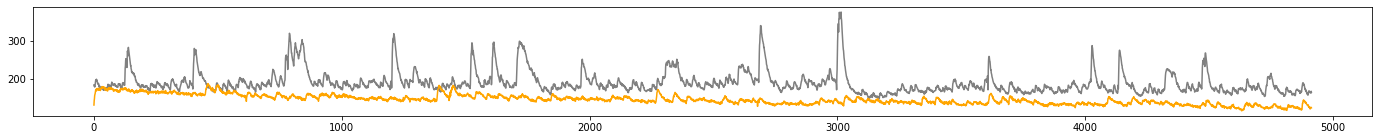

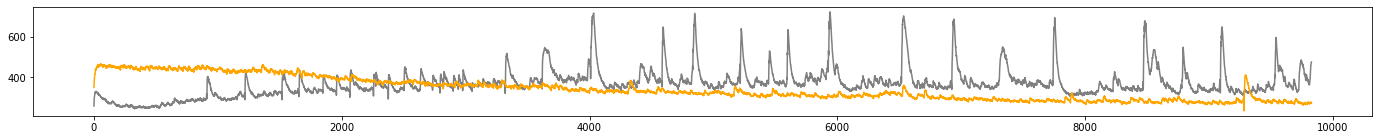

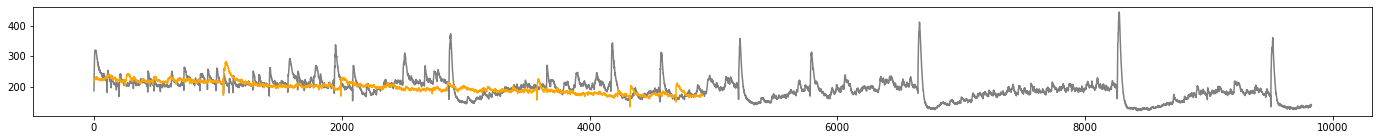

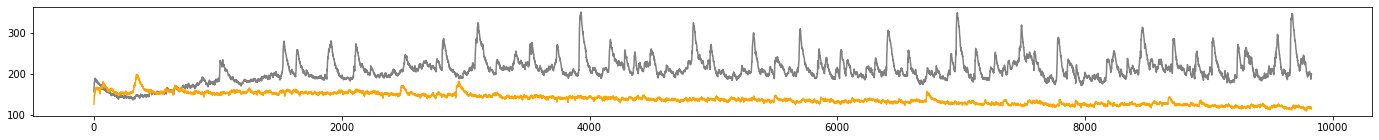

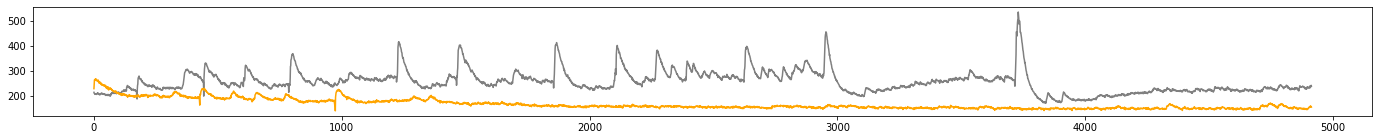

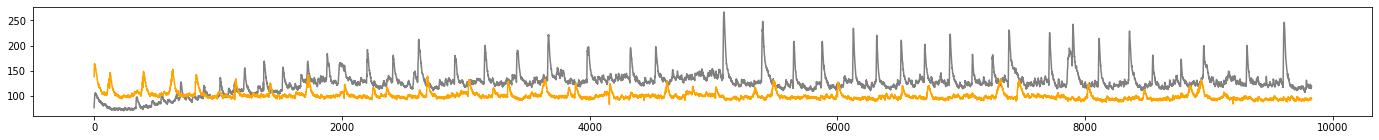

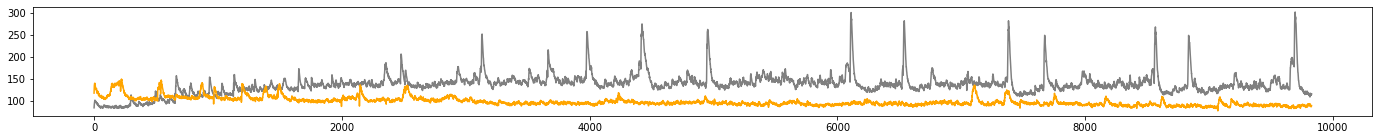

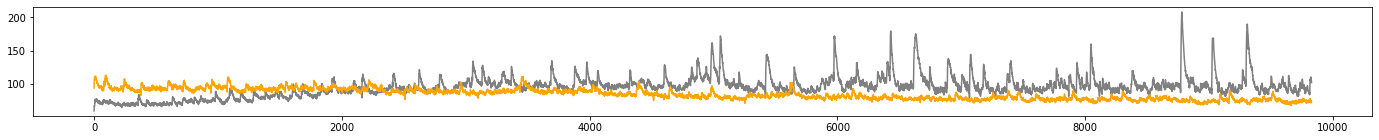

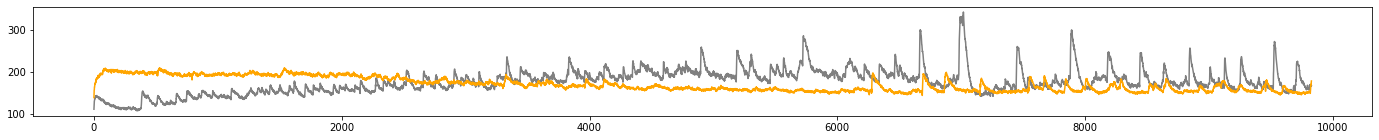

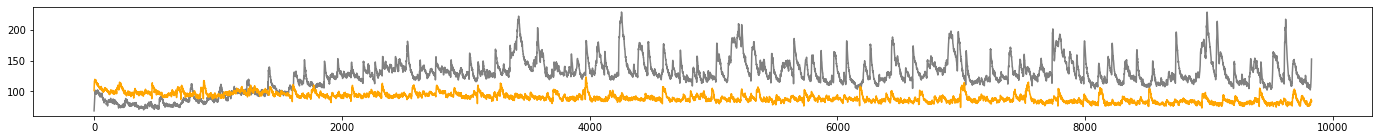

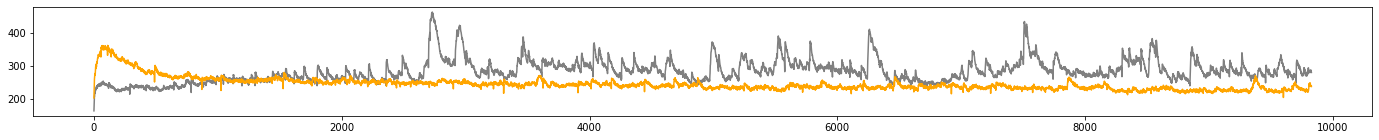

In [30]:
#PLOT PREICTAL EVENTS OVER BASELINE
for o in range(len(p5raw)):
    p5 = np.load(p5raw[o])
    fig, ax = plt.subplots(figsize= (24,2))  
    mean = np.apply_along_axis(np.mean, 0, p5)
    plt.plot(mean, c = 'grey')
    bln = np.load(blnraw[o])
    mean = np.apply_along_axis(np.mean, 0, bln)
    plt.plot(mean, c = 'orange')
    plt.show()

# Inputs

## Cell correlation
* periods of high correlation - define threshold
* local correlation - sliding spatial window

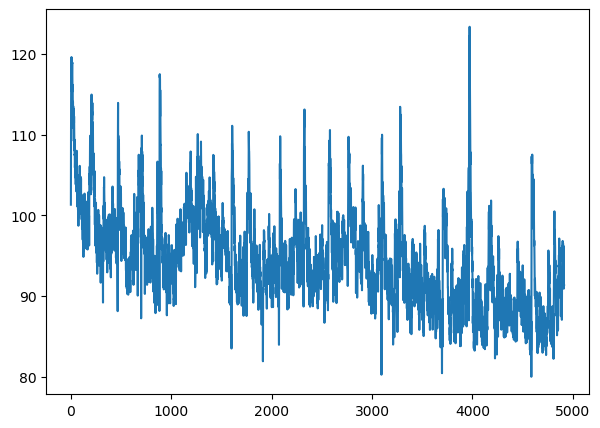

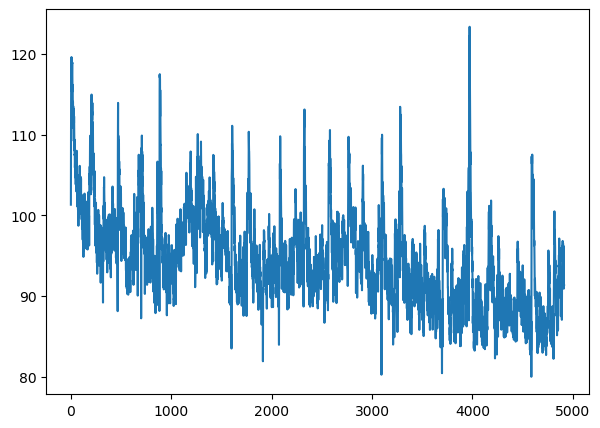

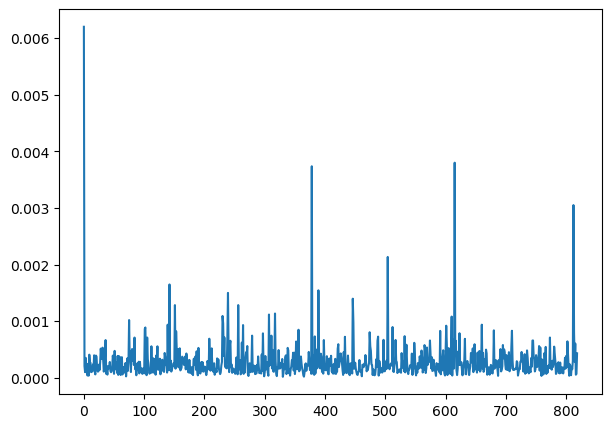

KeyboardInterrupt: 

In [36]:
#Mean correlation all cells
for i in range(len(blnraw)):
    data = np.load(blnraw[i])
    fig, axarr = plt.subplots(figsize = (7,5))
    mean = np.apply_along_axis(np.mean, 0, bln)
    plt.plot(mean)
    count = 0
    window = adfn.window(5, data.shape[1])
    corr_vec = np.zeros(np.int(data.shape[1]/window))
    for e in range(np.int(data.shape[1]/window)):
        corr_vec[e] = np.mean(np.corrcoef(data[:,count:count+window]))
        count+=window
    fig, axarr = plt.subplots(figsize = (7,5))
    plt.plot(corr_vec)
    plt.show()

In [31]:
bln.shape

(7273, 4914)

In [29]:
adfn.window(5, bln.shape[0])

7

In [30]:
bln.shape[0]

7273

In [15]:
np.corrcoef(bln)

array([[ 1.00000000e+00, -4.67494860e-02, -2.48105947e-01, ...,
         3.32219032e-02, -8.85454880e-04,  8.03526843e-03],
       [-4.67494860e-02,  1.00000000e+00, -5.12285422e-02, ...,
        -1.10932341e-02, -1.24711858e-02, -4.80669375e-03],
       [-2.48105947e-01, -5.12285422e-02,  1.00000000e+00, ...,
        -3.74610623e-02,  1.49143304e-03, -4.32227426e-03],
       ...,
       [ 3.32219032e-02, -1.10932341e-02, -3.74610623e-02, ...,
         1.00000000e+00,  1.98214279e-02,  9.75915723e-03],
       [-8.85454880e-04, -1.24711858e-02,  1.49143304e-03, ...,
         1.98214279e-02,  1.00000000e+00,  2.53080382e-02],
       [ 8.03526843e-03, -4.80669375e-03, -4.32227426e-03, ...,
         9.75915723e-03,  2.53080382e-02,  1.00000000e+00]])

In [33]:
np.corrcoef(bln[:,:10])

0.0020458868507719267

In [ ]:
#Local cells correlation

#Define windows of different sizes


## State space trajectory
* PCA - register fish to same component space?
* Velocity - euclidean distance point to point 
* Component correlation

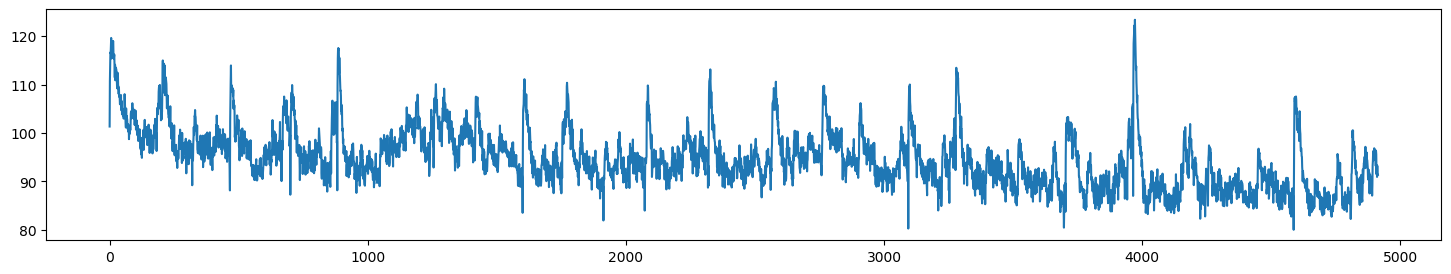

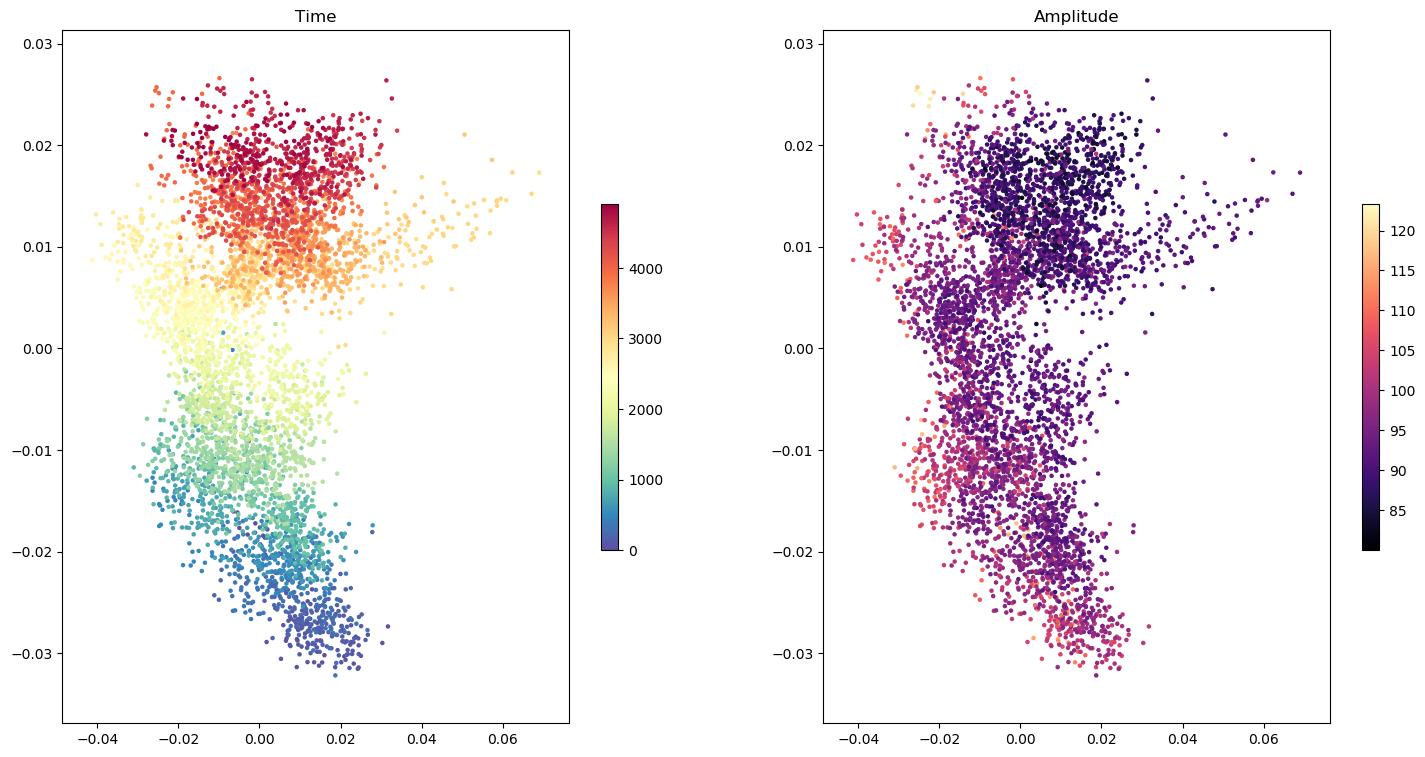

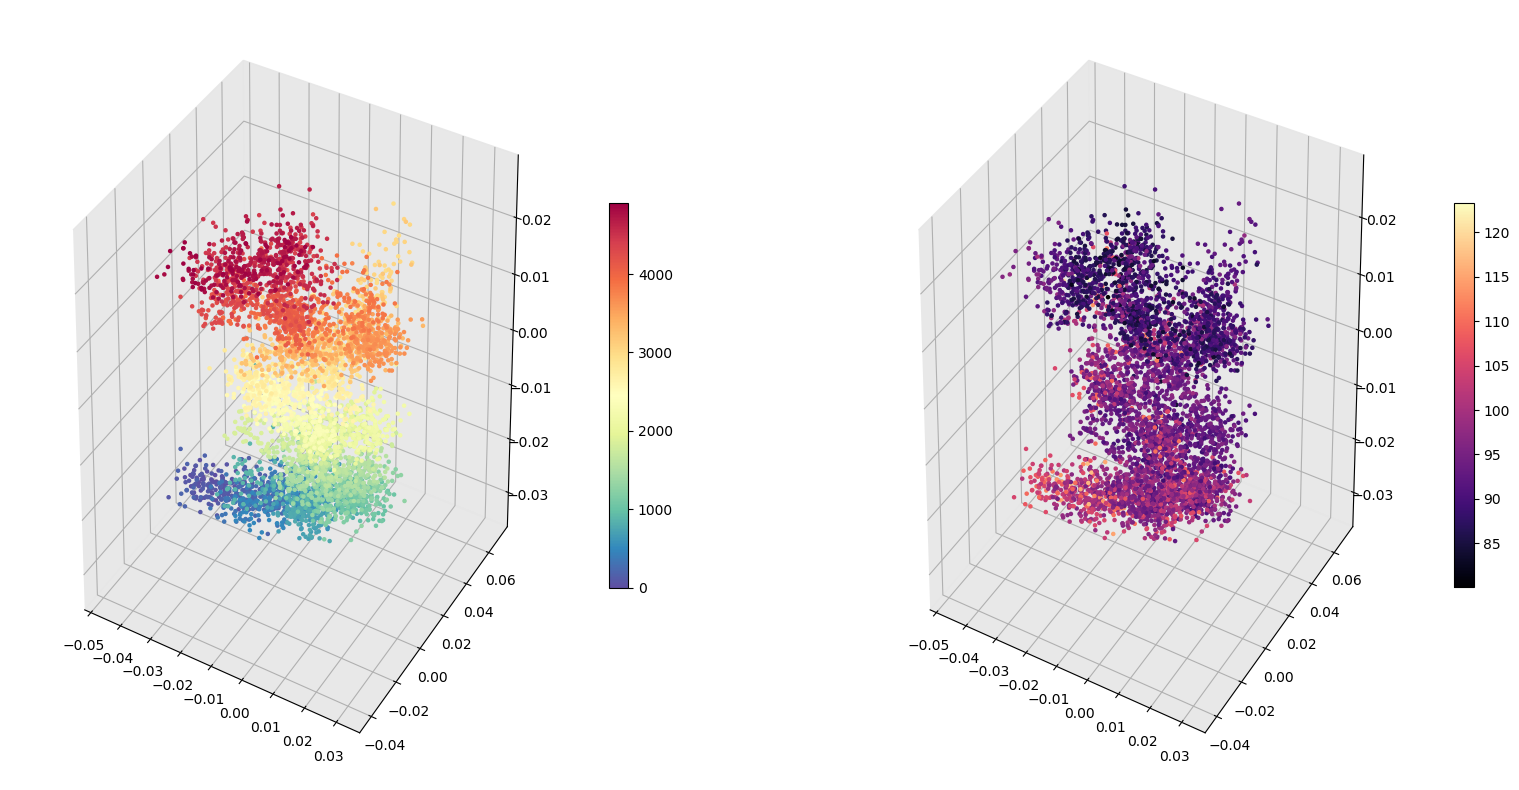

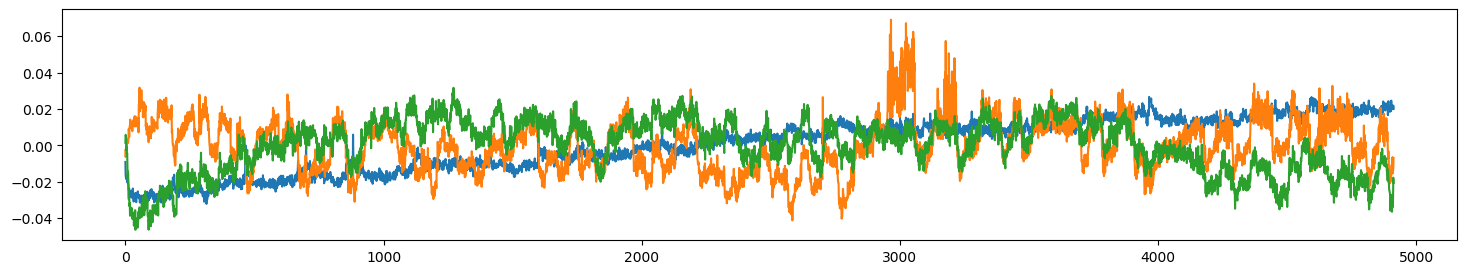

In [9]:
#matrix factorisation - time frames
#---------------------------------
i, n_components = 9, 4
bln = np.load(blnraw[i])

#PLOT TRACE AVERAGE
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
pca = decomposition.PCA(n_components)
fit = pca.fit(bln) #Make matrix entirely positive
fig, axarr = plt.subplots(1,2, figsize= (18,9))
dotplot = axarr[0].scatter(fit.components_[2,:], fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
axarr[0].set_title('Time')
fig.colorbar(dotplot, ax=axarr[0], shrink = 0.5)
dotplot = axarr[1].scatter(fit.components_[2,:], fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
axarr[1].set_title('Amplitude')
fig.colorbar(dotplot, ax=axarr[1], shrink = 0.5)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)
ax = fig.add_subplot(1, 2, 2, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)

fig, ax = plt.subplots(figsize= (18,3))
for i in range(3):
    plt.plot(fit.components_[i+1])
plt.show()

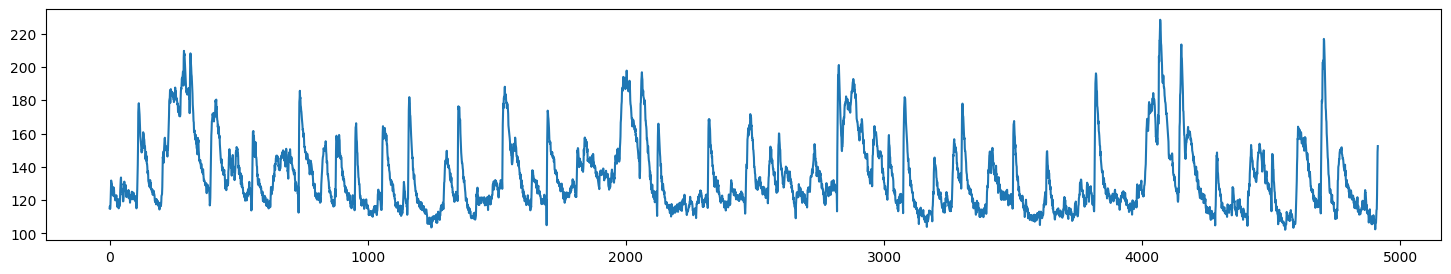

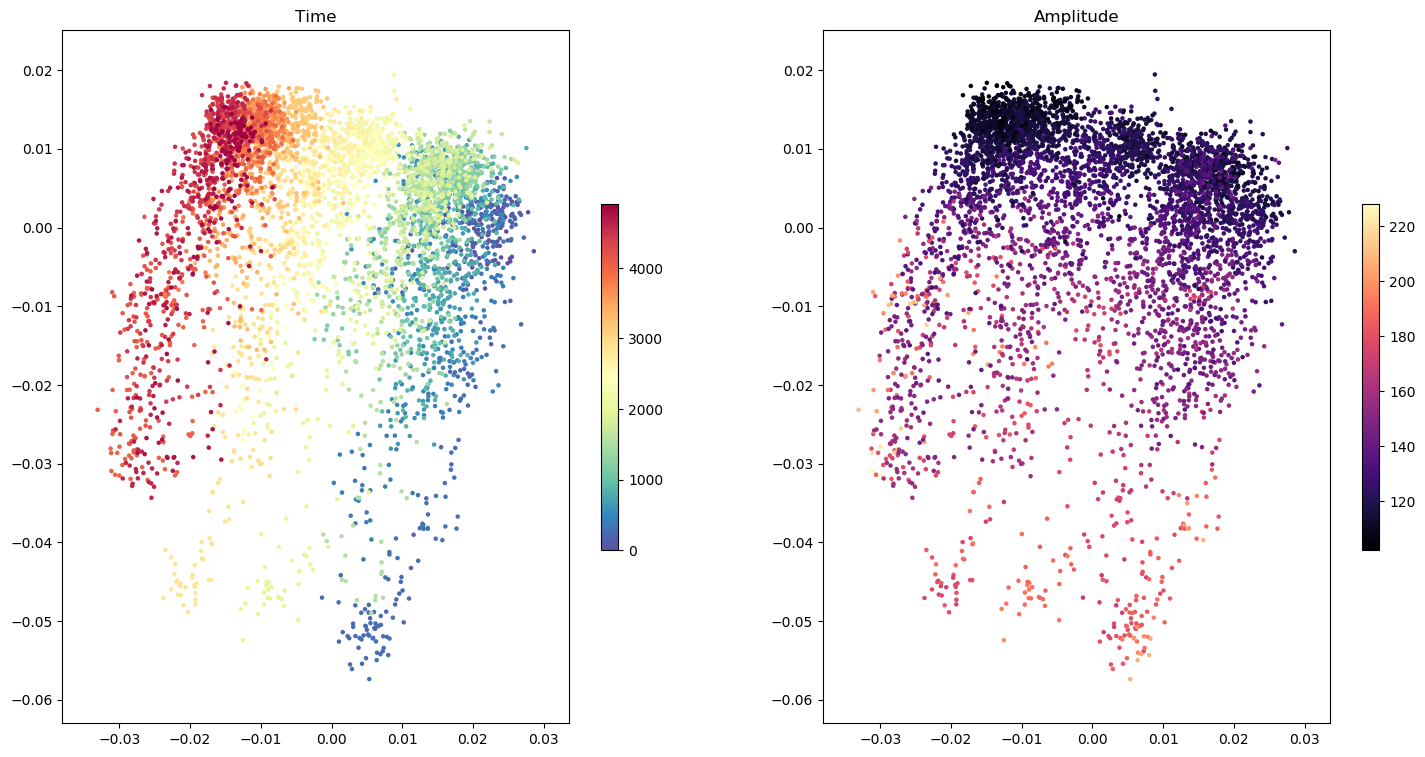

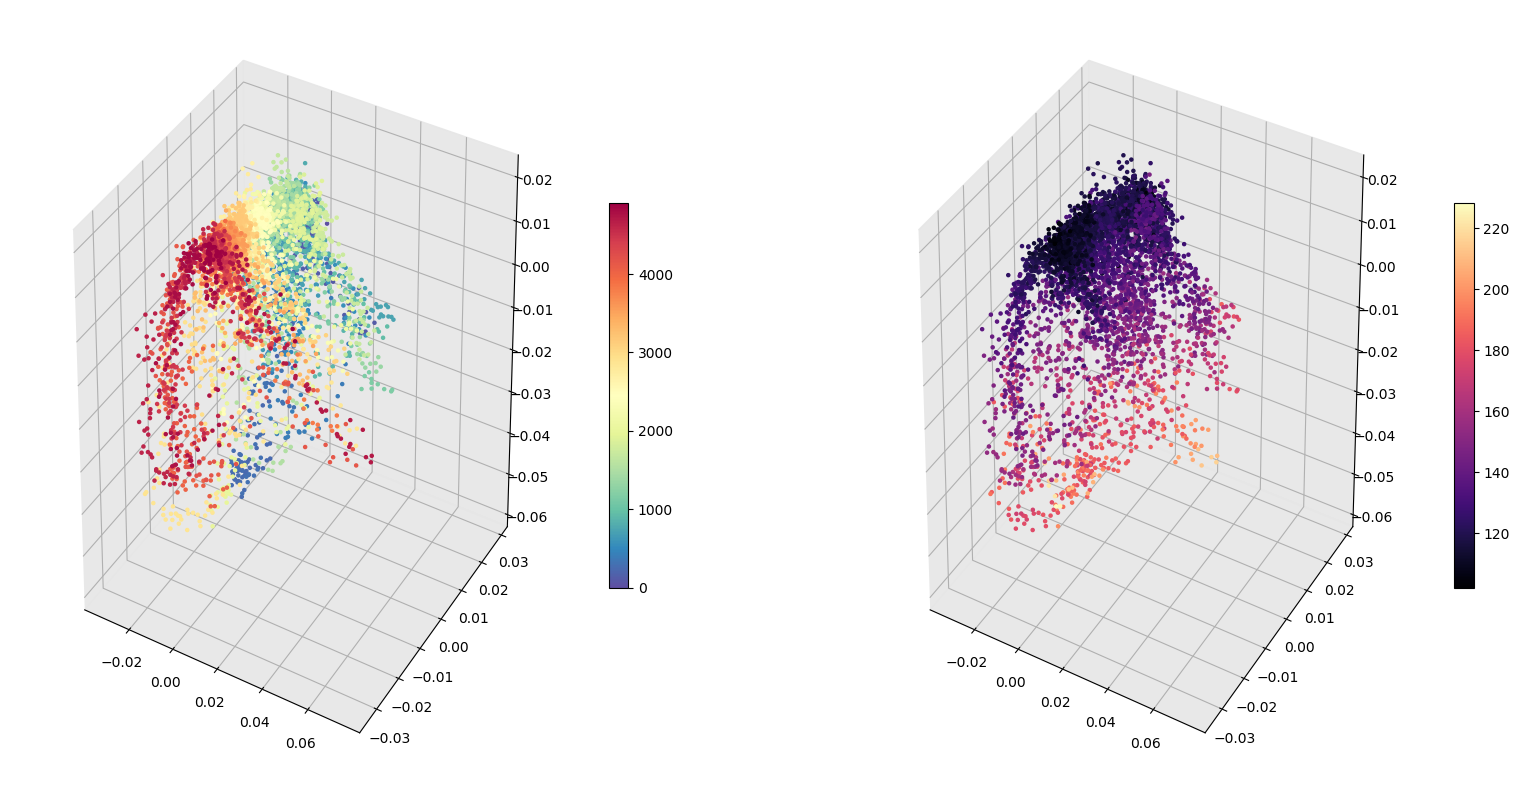

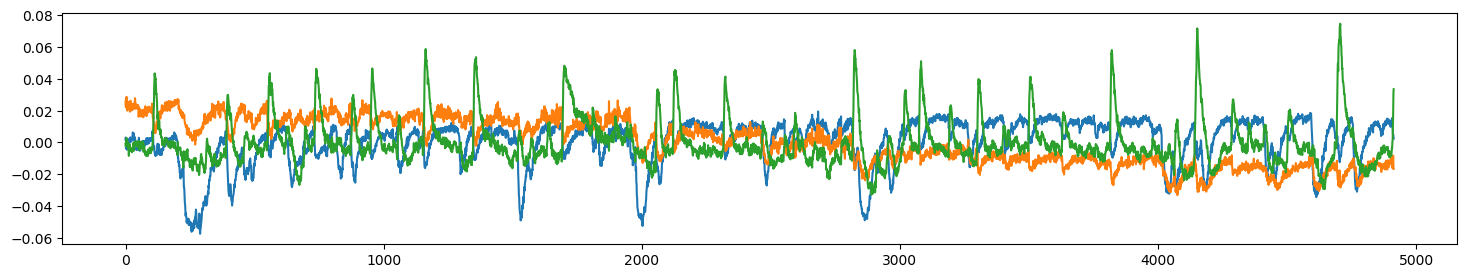

In [14]:
#matrix factorisation - time frames
#---------------------------------
i, n_components = 9, 4
p5 = np.load(p5raw[i])

#PLOT TRACE AVERAGE
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p5)
plt.plot(mean)

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
pca = decomposition.PCA(n_components)
fit = pca.fit(p5) #Make matrix entirely positive
fig, axarr = plt.subplots(1,2, figsize= (18,9))
dotplot = axarr[0].scatter(fit.components_[2,:], fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
axarr[0].set_title('Time')
fig.colorbar(dotplot, ax=axarr[0], shrink = 0.5)
dotplot = axarr[1].scatter(fit.components_[2,:], fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
axarr[1].set_title('Amplitude')
fig.colorbar(dotplot, ax=axarr[1], shrink = 0.5)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)
ax = fig.add_subplot(1, 2, 2, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)

fig, ax = plt.subplots(figsize= (18,3))
for i in range(3):
    plt.plot(fit.components_[i+1])
plt.show()

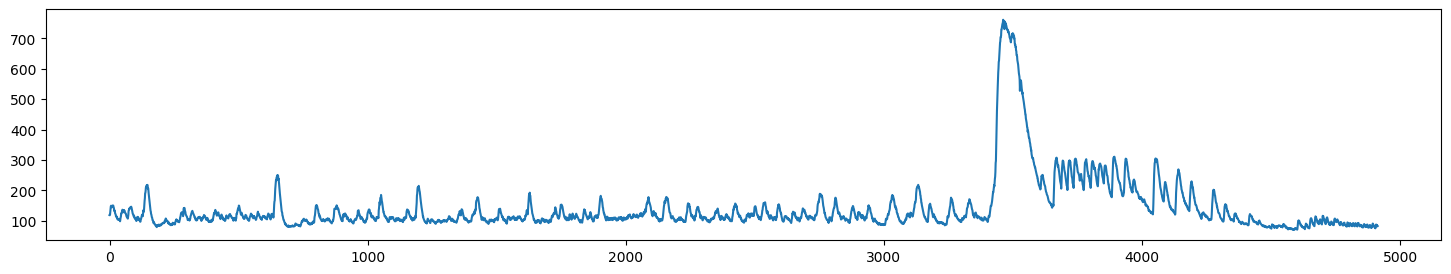

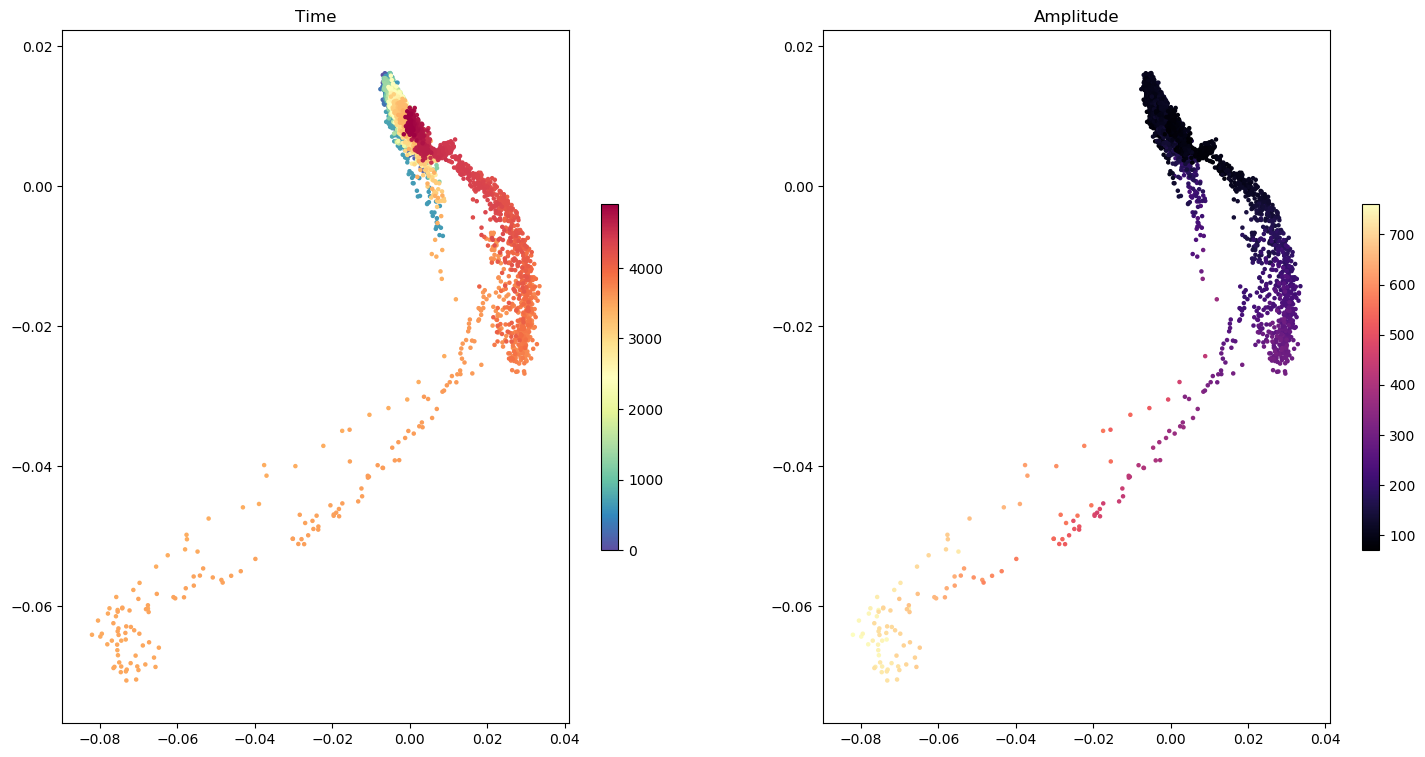

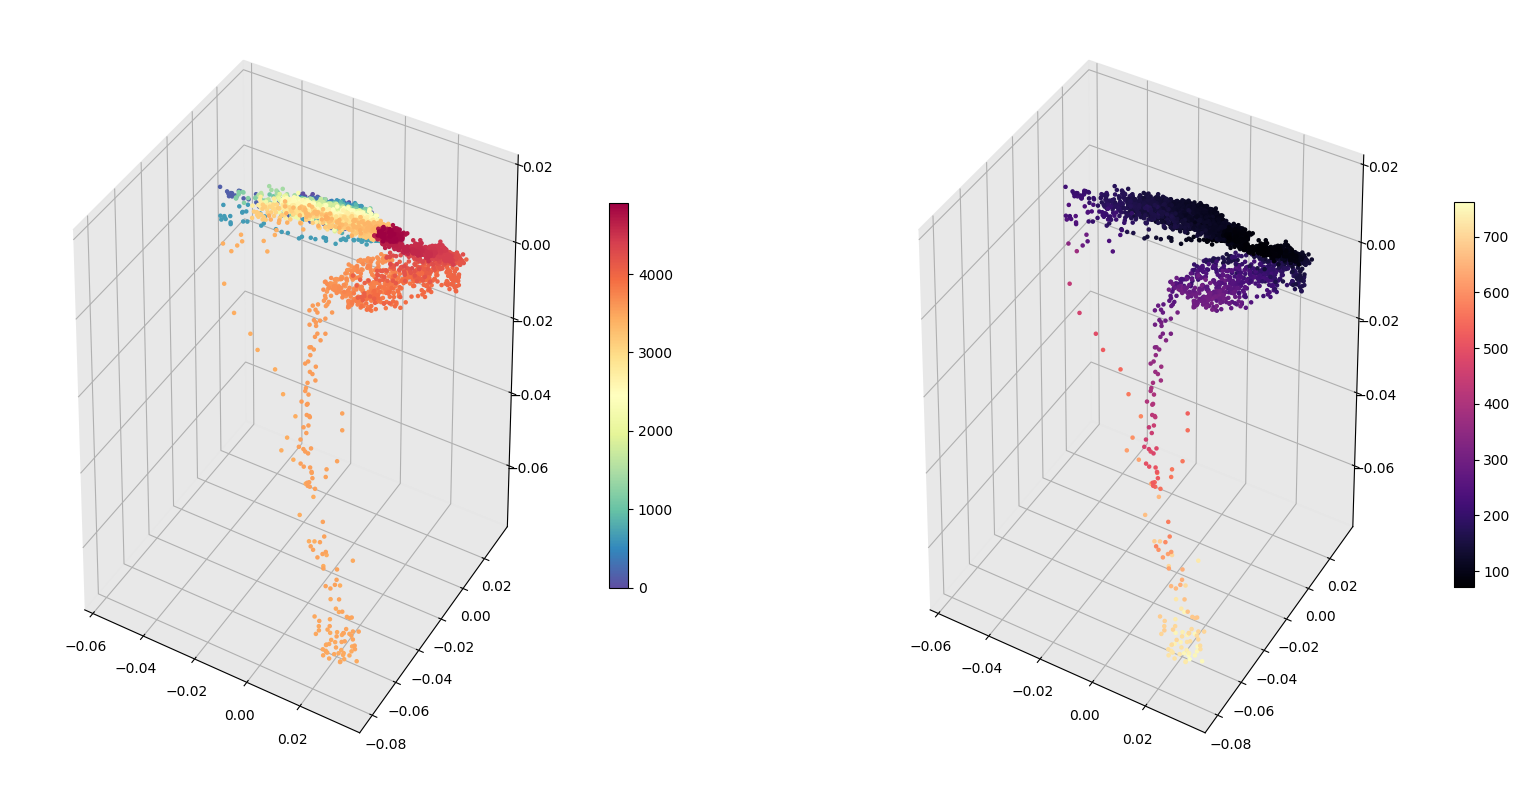

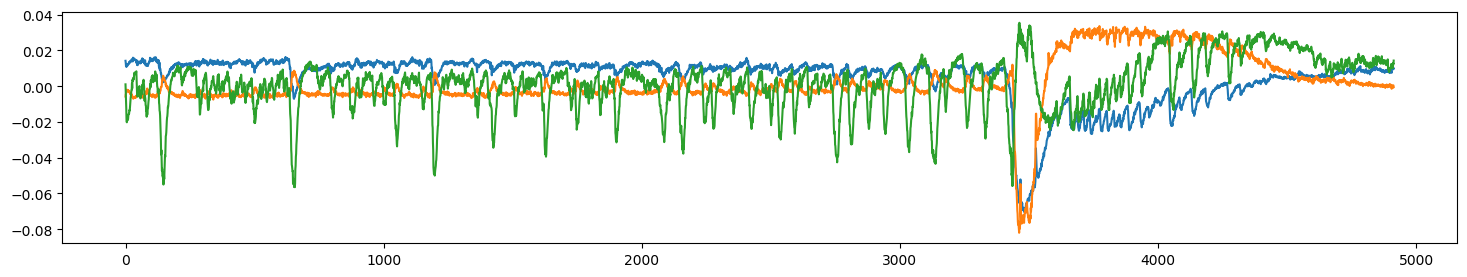

In [13]:
#matrix factorisation - time frames
#---------------------------------
i, n_components = 9, 4
p20 = np.load(p20raw[i])

#PLOT TRACE AVERAGE
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, p20)
plt.plot(mean)

#NON-NEGATIVE MATRIX FACTORISATION
from sklearn import decomposition
pca = decomposition.PCA(n_components)
fit = pca.fit(p20) #Make matrix entirely positive
fig, axarr = plt.subplots(1,2, figsize= (18,9))
dotplot = axarr[0].scatter(fit.components_[2,:], fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
axarr[0].set_title('Time')
fig.colorbar(dotplot, ax=axarr[0], shrink = 0.5)
dotplot = axarr[1].scatter(fit.components_[2,:], fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
axarr[1].set_title('Amplitude')
fig.colorbar(dotplot, ax=axarr[1], shrink = 0.5)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = np.linspace(0,fit.components_.shape[1], fit.components_.shape[1]), s = 5, alpha = 1, cmap = 'Spectral_r')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)
ax = fig.add_subplot(1, 2, 2, projection='3d')
dotplot = ax.scatter3D(fit.components_[3,:],fit.components_[2,:],fit.components_[1,:], c = mean, s = 5, alpha = 1, cmap = 'magma')
ax.w_xaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_yaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
ax.w_zaxis.set_pane_color((0.9, 0.9, 0.9, 0.9))
fig.colorbar(dotplot, shrink = 0.5)

fig, ax = plt.subplots(figsize= (18,3))
for i in range(3):
    plt.plot(fit.components_[i+1])
plt.show()

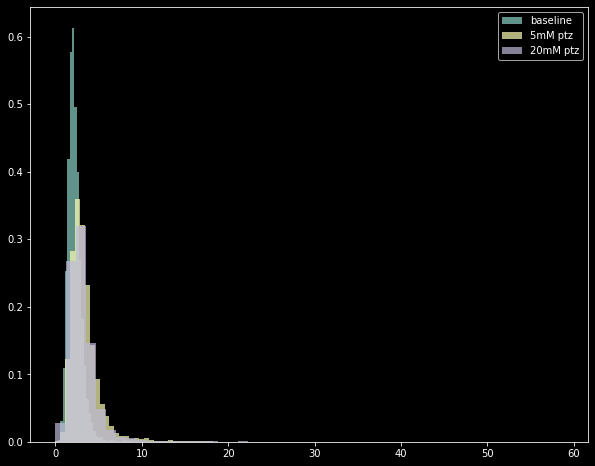

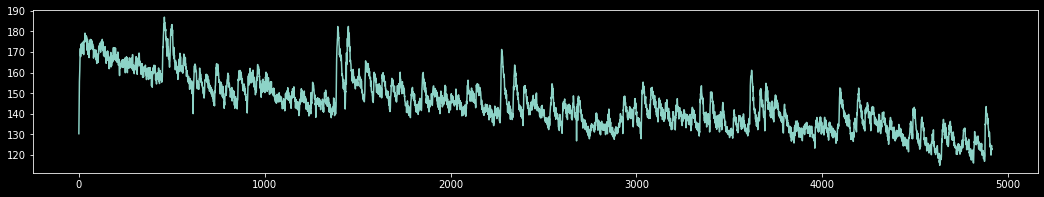

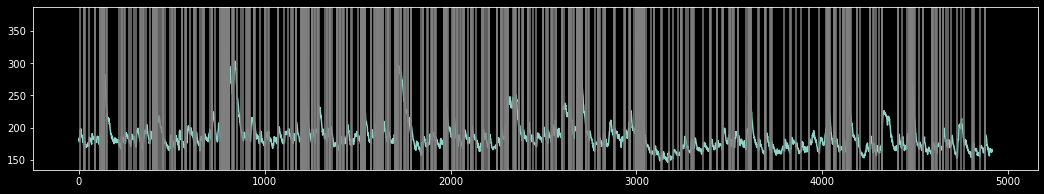

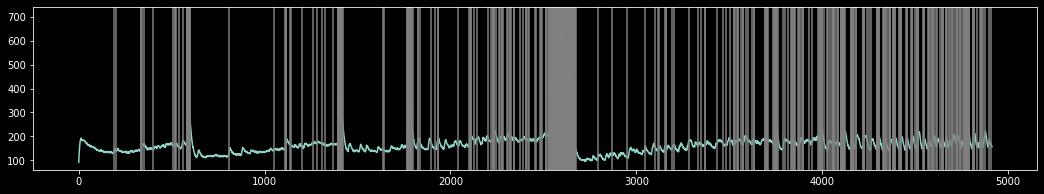

In [25]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 0, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

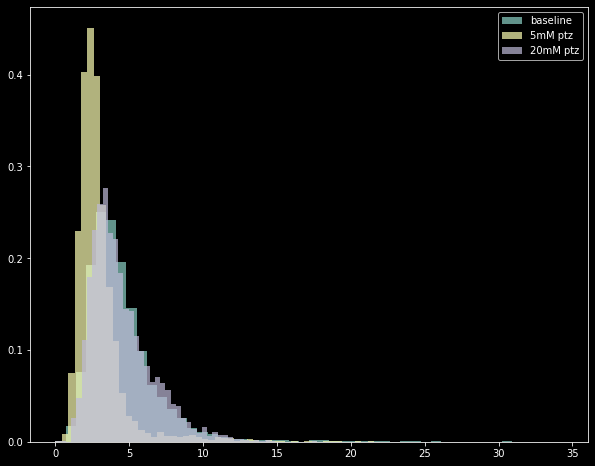

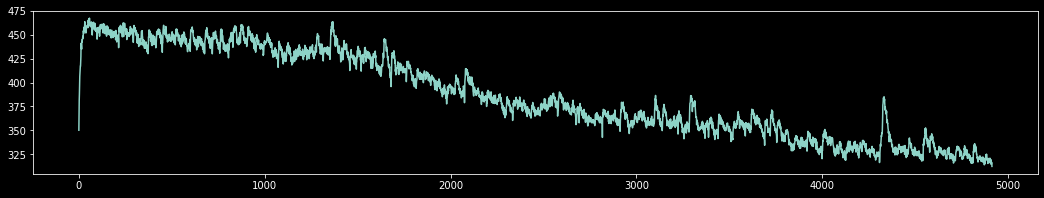

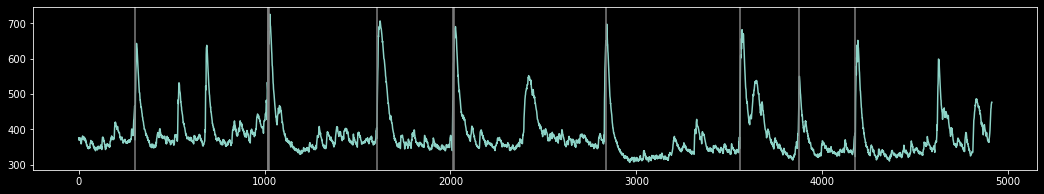

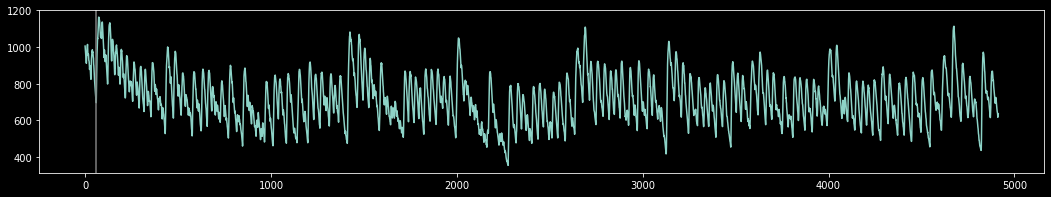

In [24]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 1, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

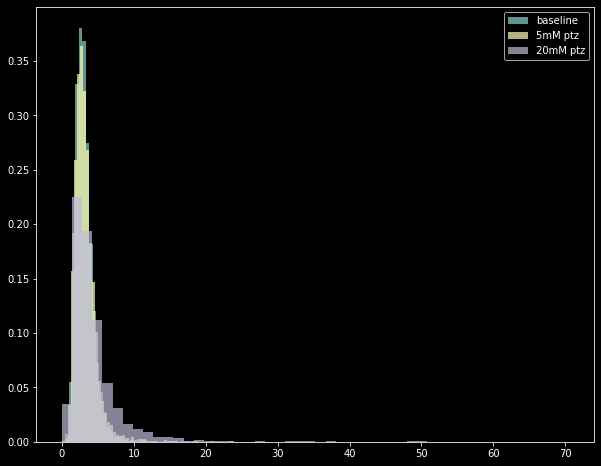

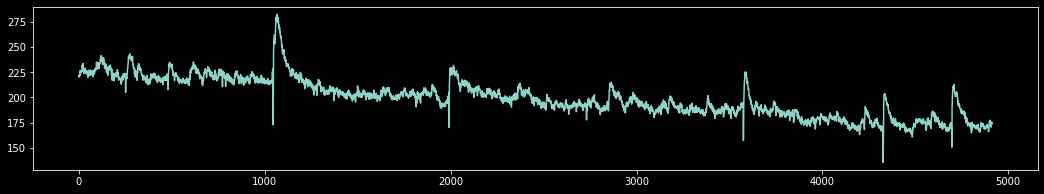

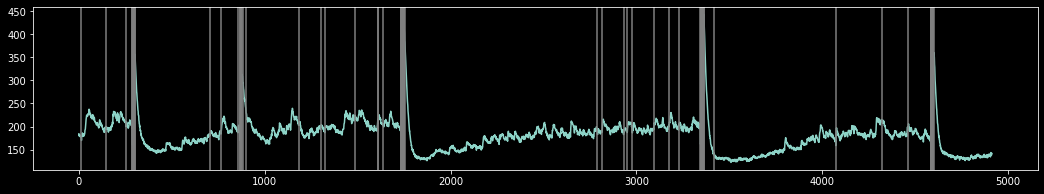

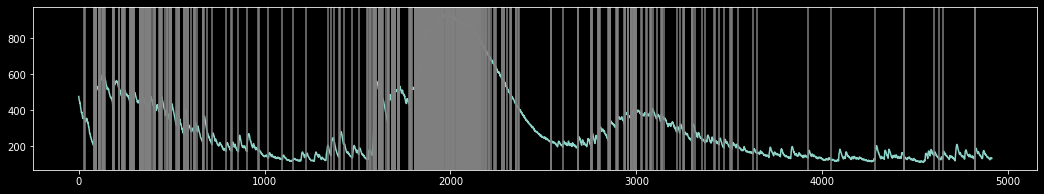

In [23]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 2, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

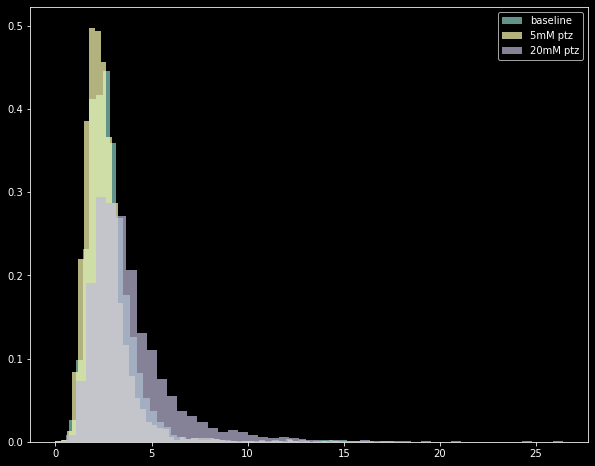

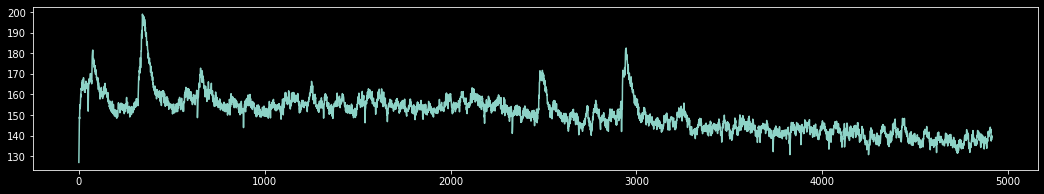

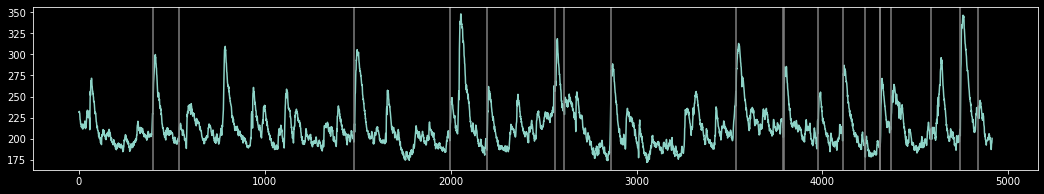

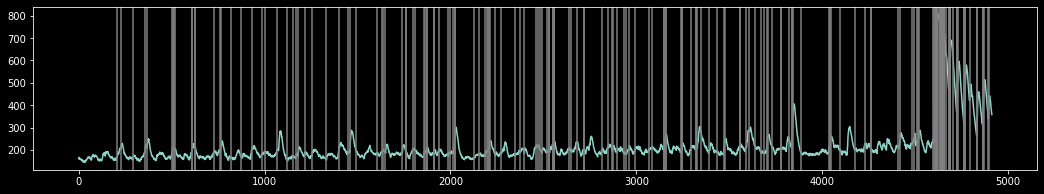

In [22]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 3, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

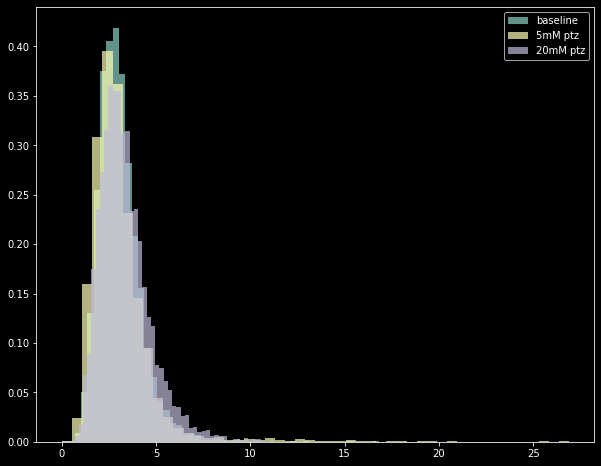

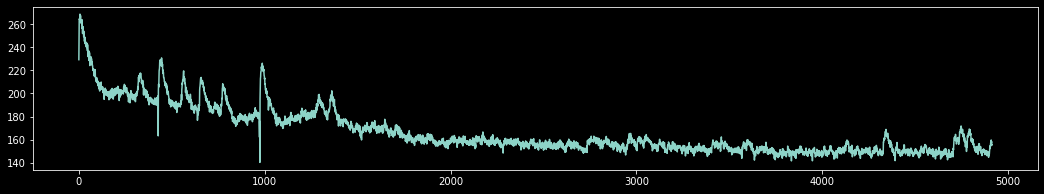

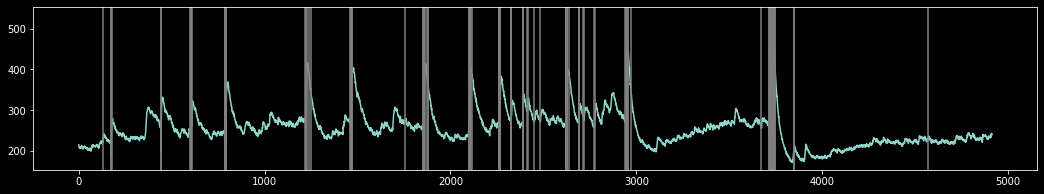

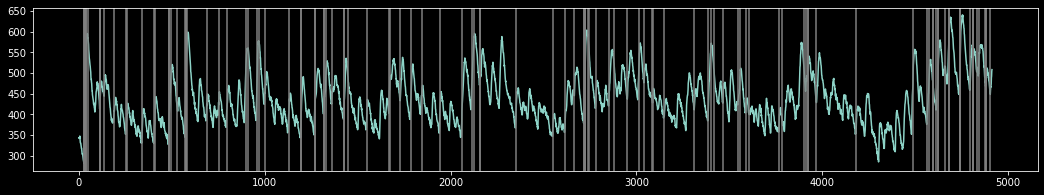

In [21]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 4, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

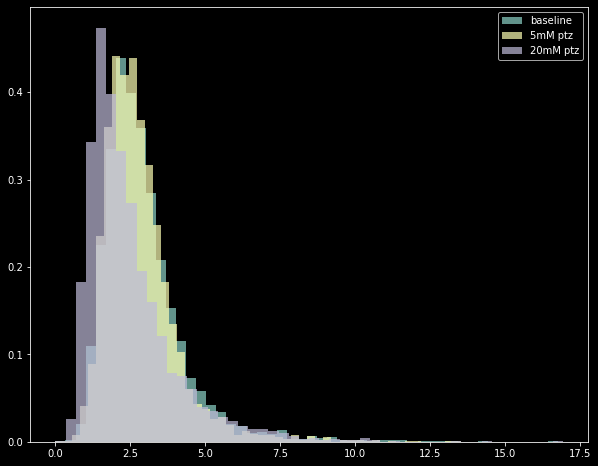

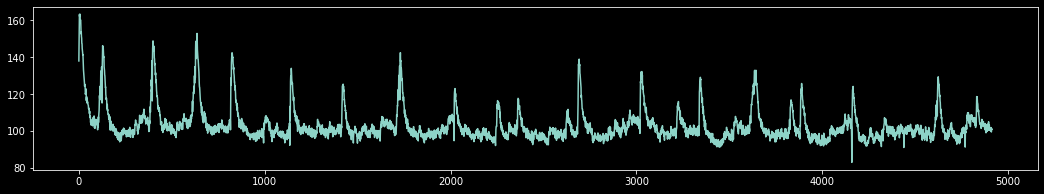

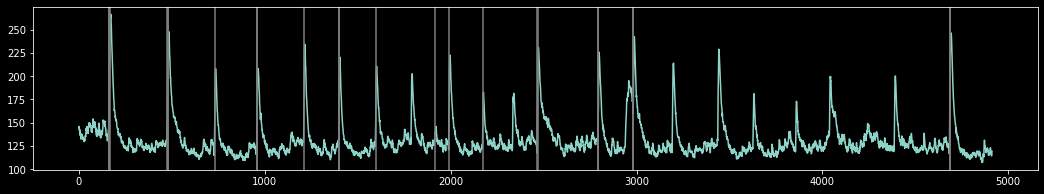

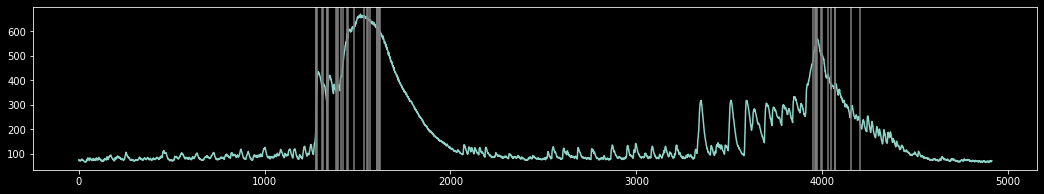

In [20]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 5, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

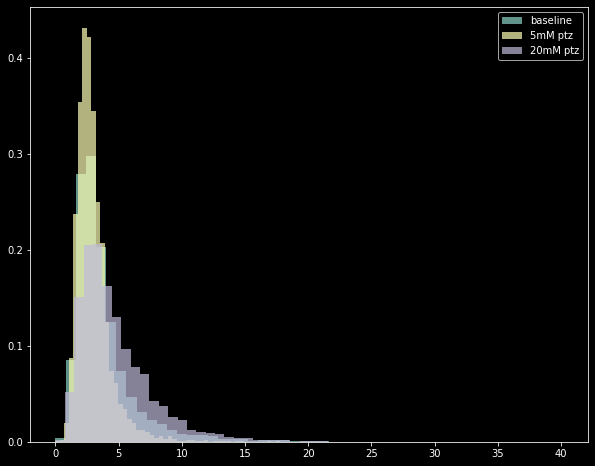

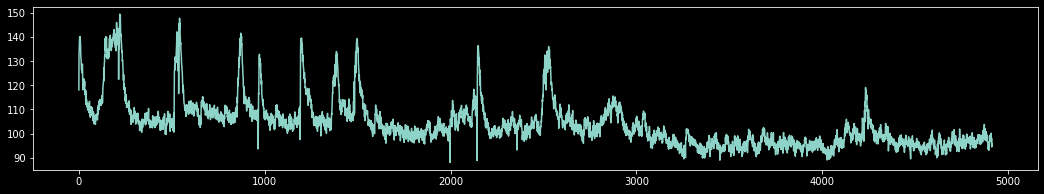

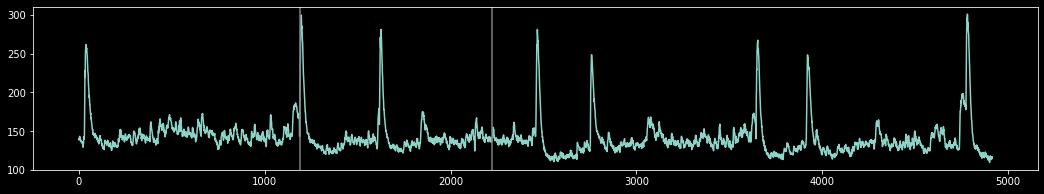

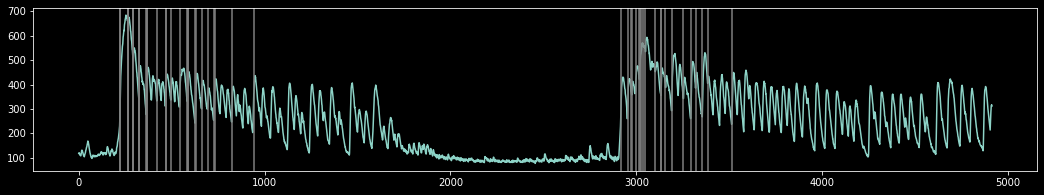

In [19]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 6, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

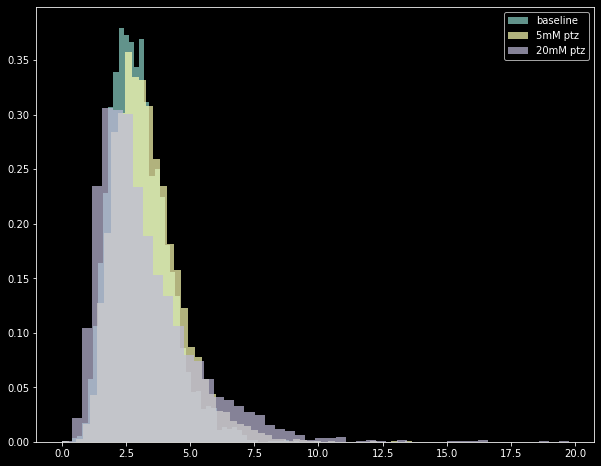

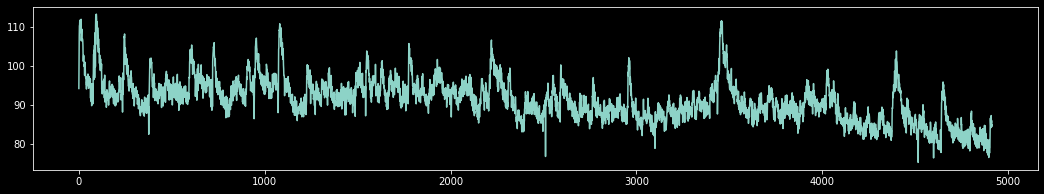

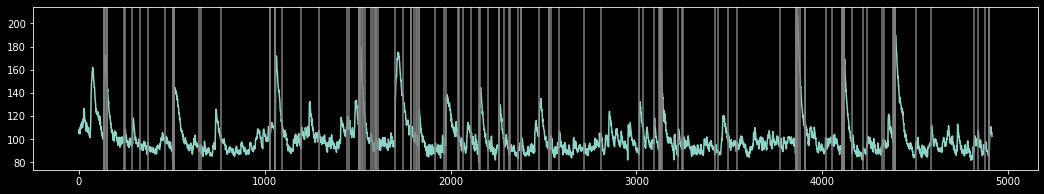

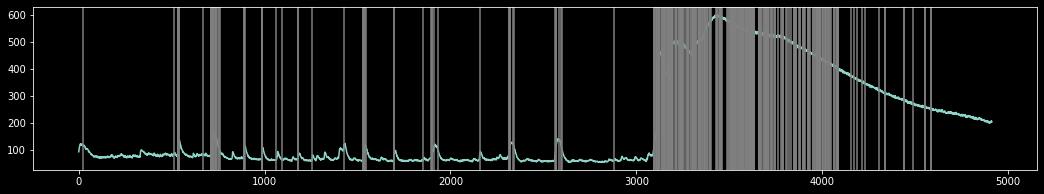

In [18]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 7, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

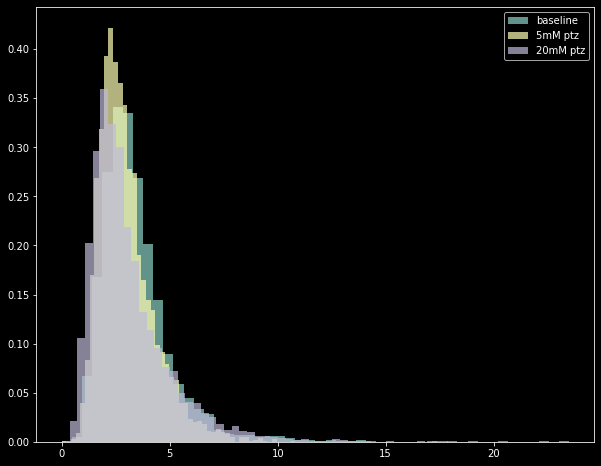

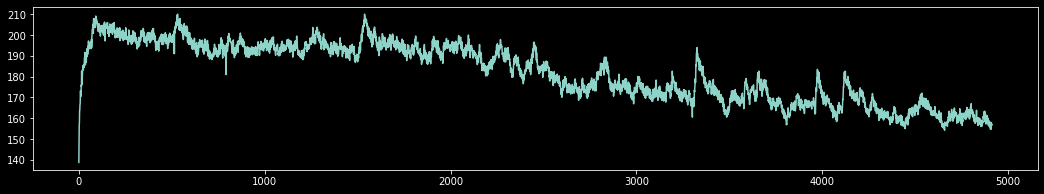

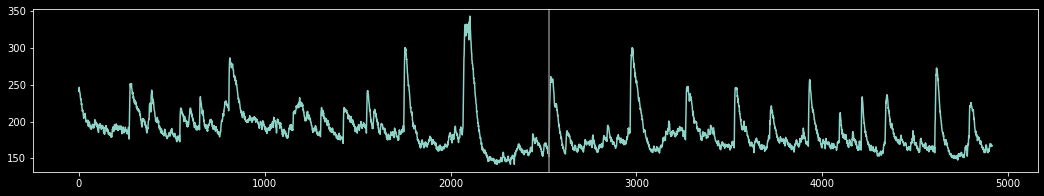

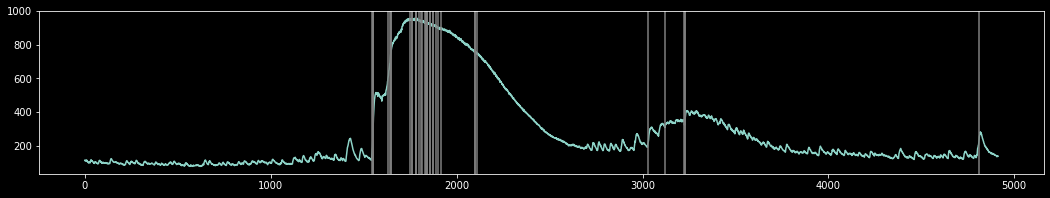

In [17]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 8, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

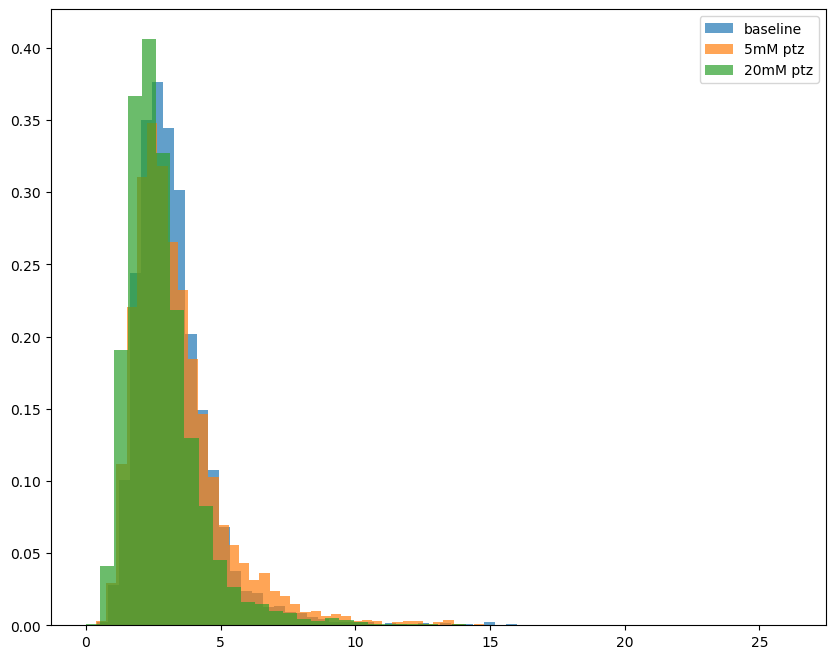

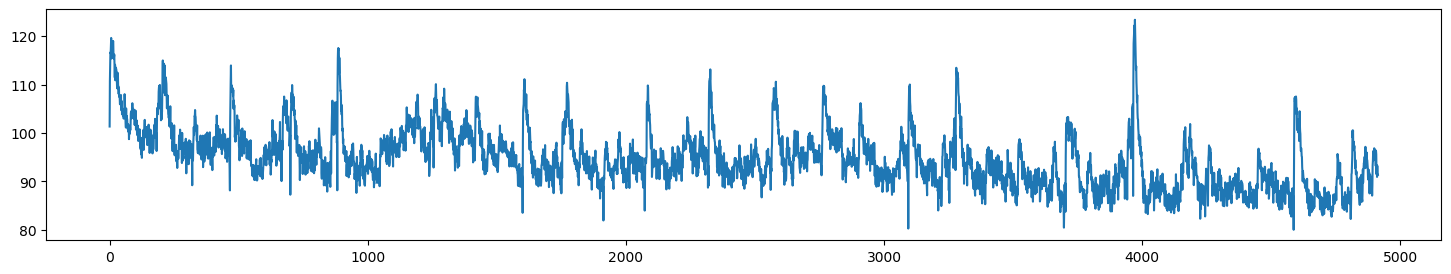

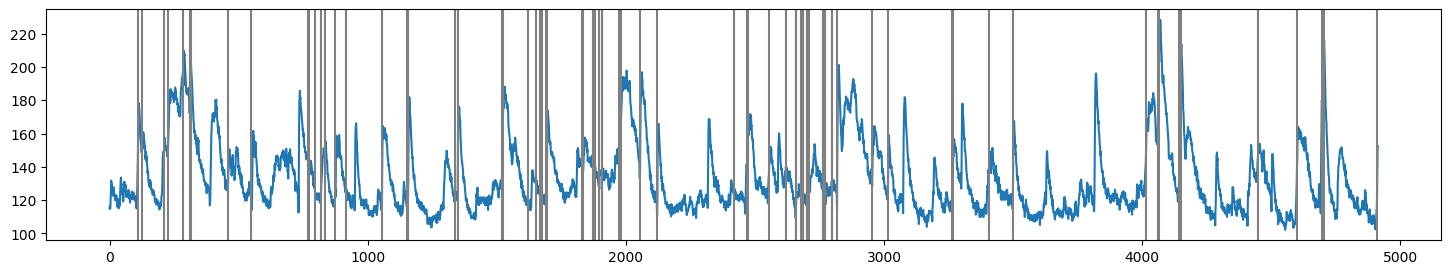

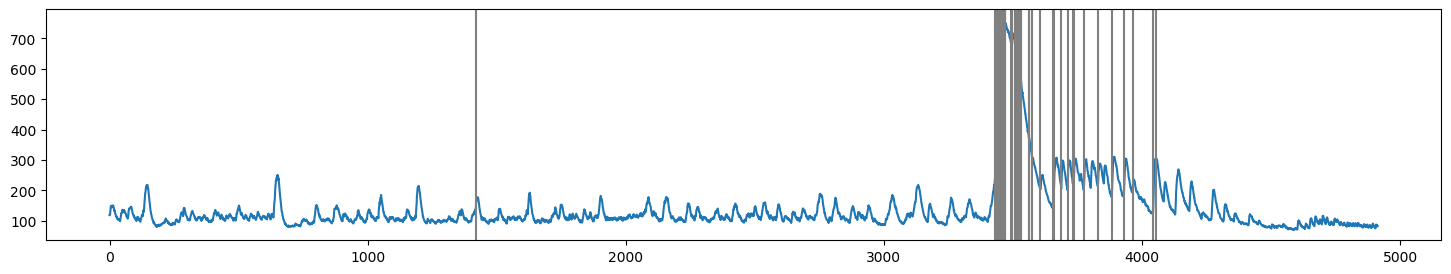

In [13]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 9, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

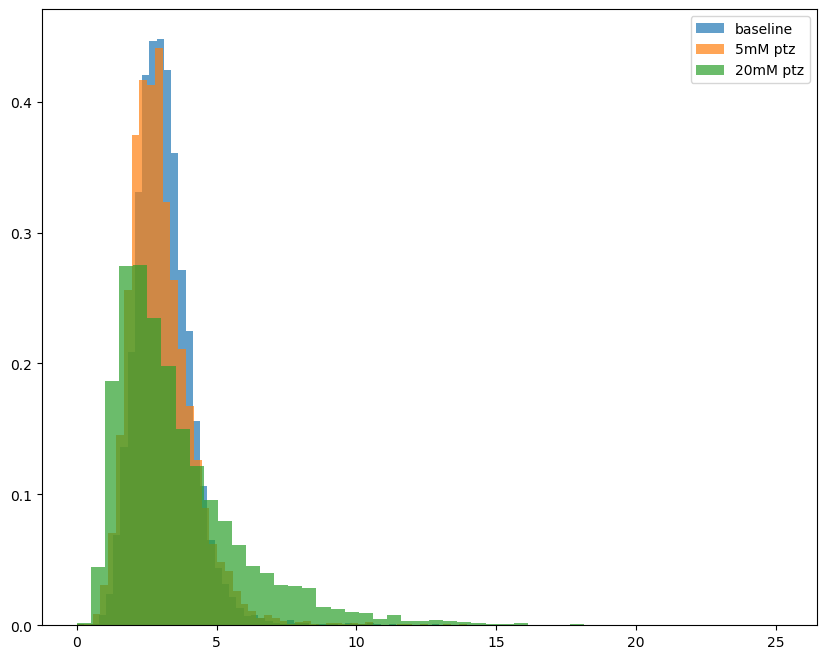

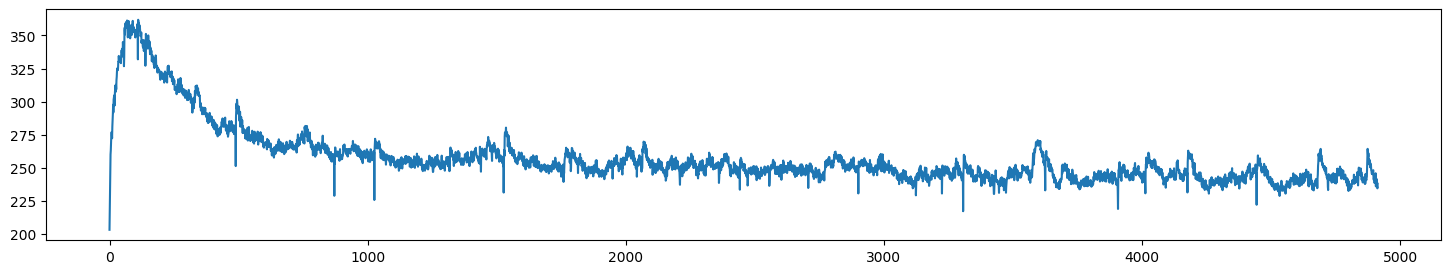

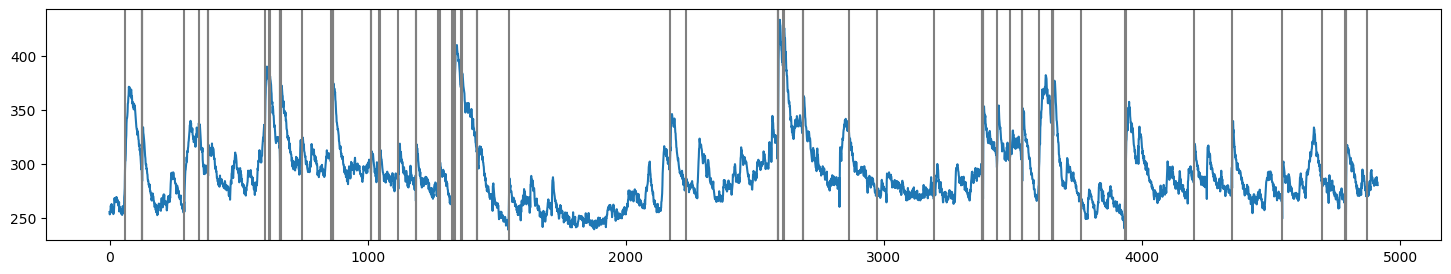

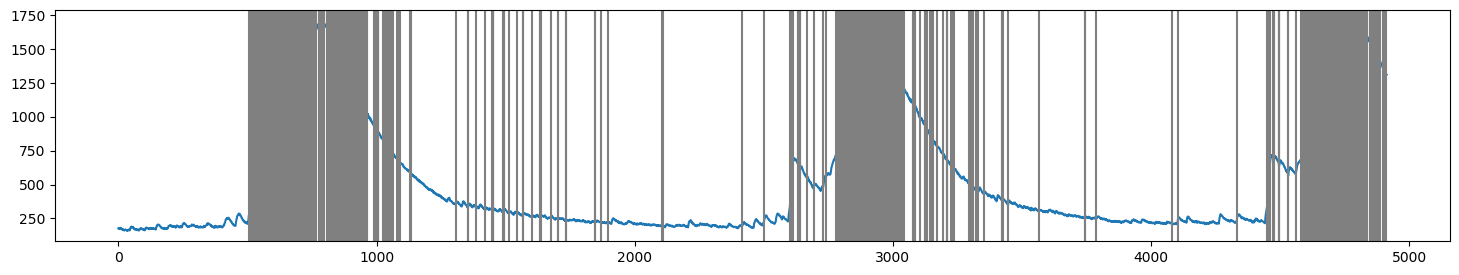

In [14]:
#NNMF - euclidean distance
#-------------------------------------
i, n_components = 10, 10
bln = np.load(blnraw[i])
p5 = np.load(p5raw[i])
p20 = np.load(p20raw[i])

#Find factors
#-------------------------------
from sklearn import decomposition
fit, dist = list(range(3)) , list(range(3)) 
bnmf = decomposition.NMF(n_components) #Define decomposition
p5nmf = decomposition.NMF(n_components) #Define decomposition
pnmf = decomposition.NMF(n_components) #Define decomposition
fit[0], fit[1], fit[2] = bnmf.fit(bln - np.min(bln)), p5nmf.fit(p5 - np.min(p5)) ,pnmf.fit(p20 - np.min(p20)) #Perform NMF on positive matrix

#Calculate euclidean distance distribution
#--------------------------------------------
dist[0], dist[1], dist[2] = np.zeros((fit[0].components_.shape[1])-1), np.zeros((fit[1].components_.shape[1])-1),np.zeros((fit[2].components_.shape[1])-1) #empty distribution
count=0
problist = list(range(3))
for e in range(len(dist)):
    for i in range(dist[e].shape[0]-1): 
        dist[e][i] = np.linalg.norm(fit[count].components_[:,i]-fit[count].components_[:,i+1]) #euclidean distance distribution
    count+=1
    
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(dist[0], bins = 50 ,alpha = 0.7, density = True, label = 'baseline')
ax.hist(dist[1], bins = 50, alpha = 0.7, density = True, label = '5mM ptz')
ax.hist(dist[2], bins = 50, alpha = 0.7, density = True, label = '20mM ptz')
ax.legend()
plt.show()

#DEFINE CUTOFF 
thresh = 99
cutoff = np.percentile(dist[0], thresh)
when = list(range(2))
fig, ax = plt.subplots(figsize= (18,3))
mean = np.apply_along_axis(np.mean, 0, bln)
plt.plot(mean)
plt.show()
plotlist=[p5,p20]
for i in range(2):
    when[i] = np.where(dist[i+1] > cutoff)[0]
    fig, ax = plt.subplots(figsize= (18,3))
    mean = np.apply_along_axis(np.mean, 0, plotlist[i])
    plt.plot(mean)
    for x in when[i]: plt.axvline(x=x, c='gray')
    plt.show()

# Identify events

## Unsupervised classification
* Threshold from baseline data - threshold across multiple data vectors 
* Cluster all data - identify events that fall out of baseline clusters

## Supervised classification
* label by eye

## Test 
* demonstrate no false positive in baseline data

# Estimate time series

## Generalised
* normalised whole brain trace
* seizure events - threshold

## Pre-ictal
* spatial window over areas of increased local correlation
* varying window sizes